In [1]:
# Dependencies and Setup
import pandas as pd
import demoji
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2
from matplotlib_venn import venn3

# File to Load
chart_path = "spotify_charts_clean_titles.csv"

# Read Chart Data File and store into Pandas DataFrames
chart_data = pd.read_csv(chart_path, encoding='utf-8')

<font size="5">Question 1</font>

Which countries were the most influential on the global Spotify market?

In [2]:
# remove global from the regions column
regional_df = chart_data[chart_data["region"] != "Global"]

In [3]:
# count countries
len(regional_df['region'].unique())

68

In [4]:
#create new df based on region
top_countries = regional_df.groupby(['region'])[['total streams','artist']].sum()
top_countries

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_49877/929104590.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_countries = regional_df.groupby(['region'])[['total streams','artist']].sum()


,total streams
region,
Argentina,19533812932
Australia,20128208340
Austria,2703190809
Belgium,3883142609
Bolivia,1170958554
...,...
United Arab Emirates,305006162
United Kingdom,36408800049
United States,142132086404


In [5]:
#sort df to find top streaming countries
sorted_countries = top_countries.sort_values('total streams', ascending = False)

#variable for top ten countries
top_ten = sorted_countries.head(10)

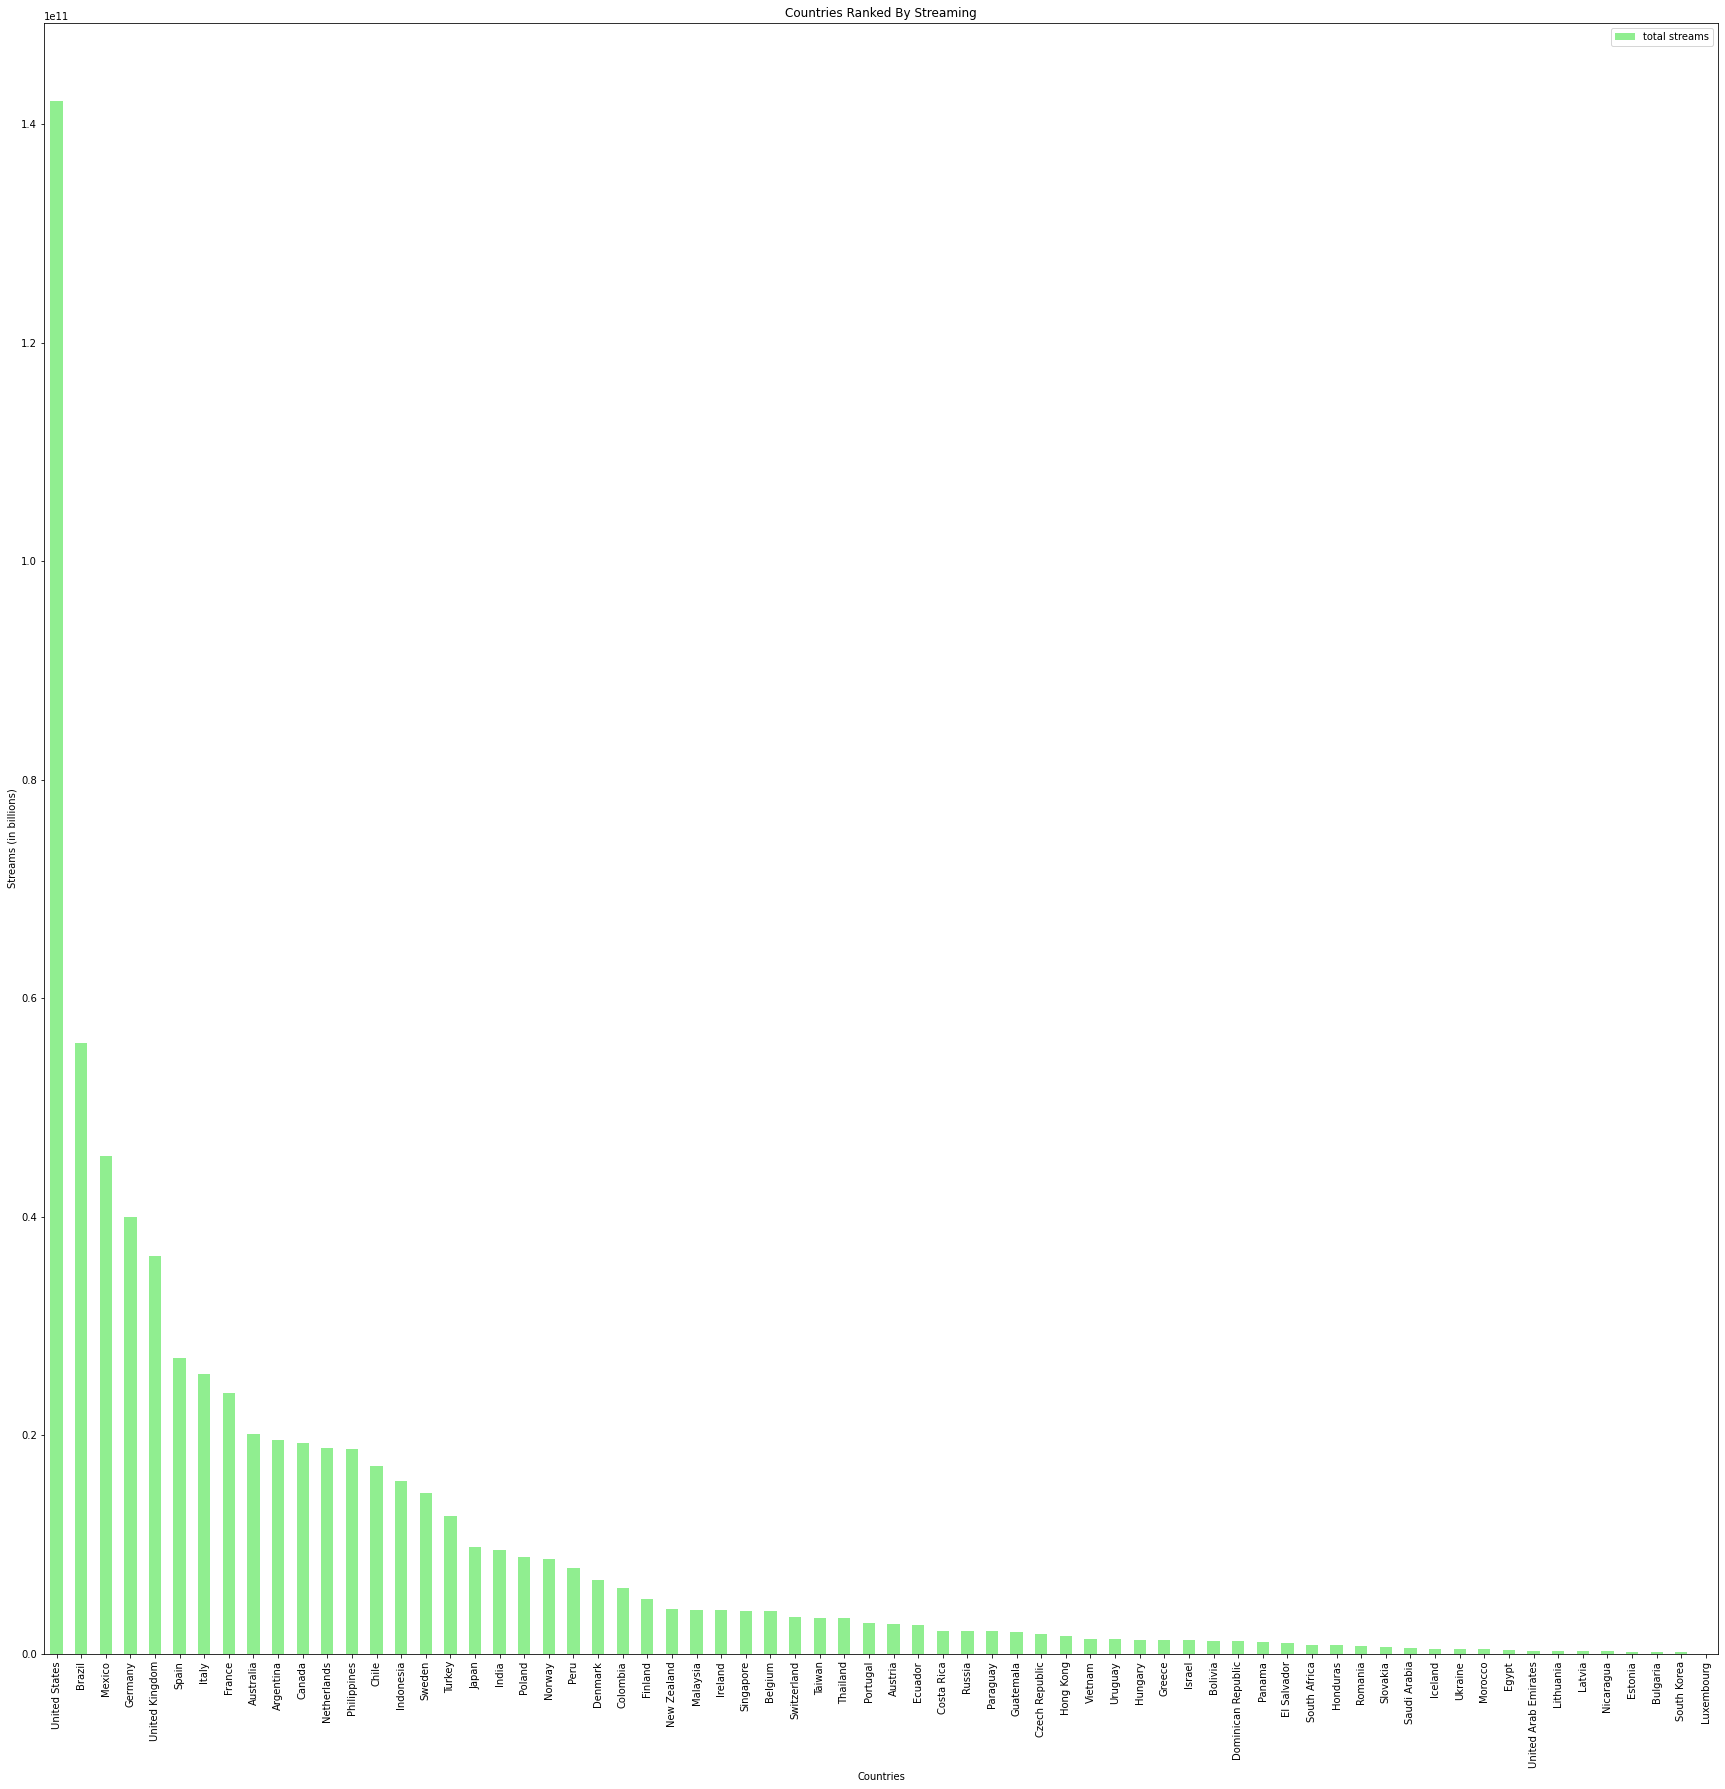

In [6]:
#create bar plot to show all countries streams 
sorted_countries_plot = sorted_countries.plot.bar(y='total streams', figsize =(30,30), width=.5, alpha=1, align="center", color = "lightgreen")

#adds title to bar chart  
plt.title("Countries Ranked By Streaming")

#label xaxis
plt.xlabel("Countries")

#lable yaxis
plt.ylabel("Streams (in billions)")

#rotate xticks to fit lables
plt.xticks(rotation = 90)

#export chart to pngs
plt.savefig("Countries_By_Streaming.png")

#show graph 
plt.show() 

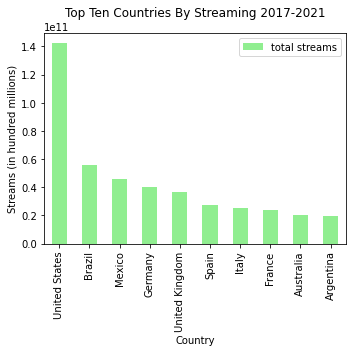

In [7]:
#create bar plot to show top 10 countries streams 
top_countries_plot = top_ten.plot.bar(y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Countries By Streaming 2017-2021")

#label xaxis
plt.xlabel("Country")

#lable yaxis
plt.ylabel("Streams (in hundred millions)")

#top_countries_plot.bar_label(top_countries["total streams"], label_type='edge')

#adjust graph layout 
plt.tight_layout()

#export chart to pngs
plt.savefig("Top_Ten_Countries_by_Streaming.png")

#show graph 
plt.show()

In [8]:
#Find total streams for US
us = regional_df.loc[regional_df["region"] == "United States"]

#sum total streams
us_streaming = us["total streams"].sum()
us_streaming

142132086404

In [9]:
# #Find total streams overall
# overall = regional_df.loc[regional_df["region"] != "United States"]

#Sum total streams overall
overall_streaming = regional_df["total streams"].sum()

#Calcuate percent of streams that are from US
us_percent_streaming = (us_streaming/overall_streaming) * 100

#print streaming percentage
us_percent_streaming

print(f"The U.S. market makes up {us_percent_streaming}% of the total global Spotify streams from 2017-2021.")

The U.S. market makes up 20.78833584283174% of the total global Spotify streams from 2017-2021.


In [10]:
#BRANCHED CODE:
#pie chart comparing total US streams to all other regions:

#remove global and United States from the regions column
non_us_df = chart_data[(chart_data["region"] != "Global") & (chart_data["region"] != "United States")]
non_us_df['total streams'].sum()

541578661193

In [11]:
#count countries - 
countries_count = [non_us_df['total streams'].sum(),us['total streams'].sum()]
countries_count

usvglobe_dict = pd.DataFrame({'Country': ['International', 'United States'],
                          'Total Countries':countries_count})

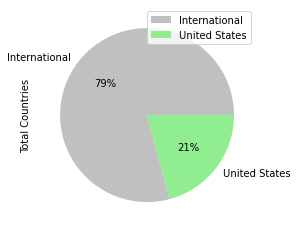

In [12]:
colors = ['silver', 'lightgreen']
usvglobe_dict.groupby(['Country']).sum().plot(kind='pie', y='Total Countries',autopct='%1.0f%%',colors=colors)

#export chart to pngs
plt.savefig("US_Streaming_Percentage.png")

plt.show()

<font size="5">Question 2</font>

What are the top ranked songs globally and in the top streaming country?

Top Songs 2017

In [13]:
# create data frame that only includes songs and streaming information for 2017
df_2017 = regional_df[(regional_df["date"] == 2017)]
df_2017.head()

,date,title,artist,region,total streams
0,2017,All That Is or Ever Was or Ever Will Be,Alan Silvestri,Poland,3547
1,2017,All That Is or Ever Was or Ever Will Be,Alan Silvestri,Turkey,3764
2,2017,"Read All About It, Pt III",Emeli Sandé,Belgium,15971
3,2017,"Read All About It, Pt III",Emeli Sandé,Czech Republic,6855
4,2017,"Read All About It, Pt III",Emeli Sandé,Denmark,6967


In [14]:
# double bracket to keep from changing to a series, this line also totals the non global streams for each song
songs_by_total_streams17=df_2017.groupby("title")[["total streams"]].sum()
songs_by_total_streams17

,total streams
title,
&Run,7759
'Till I Collapse,67427550
(Don't Fear) The Reaper,790699
(Everything I Do) I Do It For You,151773
(I Can't Get No) Satisfaction - Mono Version / Remastered 2002,150228
...,...
불타오르네 FIRE,184096
에너제틱 Energetic,22362
에너제틱 Energetic - Prequel Remix,1326


In [15]:
# sort dataframe of all 2017 songs by total streams in descending order 
songs_2017 = songs_by_total_streams17.sort_values('total streams', ascending = False)
songs_2017

,total streams
title,
Shape of You,1485011223
Despacito - Remix,901311647
Despacito (Featuring Daddy Yankee),713989511
Something Just Like This,684811328
Unforgettable,675790624
...,...
Улети,1002
Hvað Finnst Þér Um Það? (feat Kilo),1002
Eső,1002


In [16]:
#save top ten rows by streaming 
top_songs_2017 = songs_2017.head(10)

#print top ten
top_songs_2017.reset_index()

,title,total streams
0,Shape of You,1485011223
1,Despacito - Remix,901311647
2,Despacito (Featuring Daddy Yankee),713989511
3,Something Just Like This,684811328
4,Unforgettable,675790624
5,HUMBLE,638380698
6,rockstar,592356193
7,It Ain't Me (with Selena Gomez),581998277
8,That's What I Like,552711692
9,Attention,548253656


In [17]:
#save top 100 rows by streaming for further analaysis section
top_songs_2017_ext = songs_2017.head(100).reset_index()
top_songs_2017_ext

,title,total streams
0,Shape of You,1485011223
1,Despacito - Remix,901311647
2,Despacito (Featuring Daddy Yankee),713989511
3,Something Just Like This,684811328
4,Unforgettable,675790624
...,...,...
95,Lonely Together (feat Rita Ora),205031952
96,Starving,201325336
97,Weak,200754748
98,Hear Me Now,199788042


In [18]:
#create datframe for US 2017
df_US_2017 = regional_df[(regional_df["region"] == "United States") & (regional_df["date"] == 2017)]

#sort df by total streams 
songs_US_2017 = df_US_2017.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2017 = songs_US_2017.head(10)

#print top ten
top_songs_US_2017

,date,title,artist,region,total streams
20921,2017,HUMBLE,Kendrick Lamar,United States,334342280
11196,2017,Congratulations,"Post Malone, Quavo",United States,280284916
48223,2017,Shape of You,Ed Sheeran,United States,278916058
33970,2017,Mask Off,Future,United States,239307360
12993,2017,Despacito - Remix,"Luis Fonsi, Daddy Yankee, Justin Bieber",United States,232299068
64210,2017,rockstar,"Post Malone, 21 Savage",United States,225517132
64085,2017,iSpy (feat Lil Yachty),KYLE,United States,224773101
31732,2017,Location,Khalid,United States,222266305
268,2017,1-800-273-8255,"Logic, Alessia Cara, Khalid",United States,216950629
58449,2017,Unforgettable,"French Montana, Swae Lee",United States,215180711


In [19]:
#save top 100 rows by streaming for further analysis section
top_songs_US_2017_ext = songs_US_2017.head(100)
top_songs_US_2017_ext

,date,title,artist,region,total streams
20921,2017,HUMBLE,Kendrick Lamar,United States,334342280
11196,2017,Congratulations,"Post Malone, Quavo",United States,280284916
48223,2017,Shape of You,Ed Sheeran,United States,278916058
33970,2017,Mask Off,Future,United States,239307360
12993,2017,Despacito - Remix,"Luis Fonsi, Daddy Yankee, Justin Bieber",United States,232299068
...,...,...,...,...,...
24992,2017,I Like Me Better,Lauv,United States,74622442
63304,2017,You Was Right,Lil Uzi Vert,United States,74207159
7235,2017,Both (feat Drake),Gucci Mane,United States,74153982
53132,2017,Swalla (feat Nicki Minaj & Ty Dolla sign),Jason Derulo,United States,73566694


In [20]:
# perform outer merge to include US streams and the sum of non global streams for each song
outer_merged = pd.merge(top_songs_2017, top_songs_US_2017, how="outer", on=["title"])
len(outer_merged)
outer_merged

,title,total streams_x,date,artist,region,total streams_y
0,Shape of You,1.485011e+09,2017.0,Ed Sheeran,United States,278916058.0
1,Despacito - Remix,9.013116e+08,2017.0,"Luis Fonsi, Daddy Yankee, Justin Bieber",United States,232299068.0
2,Despacito (Featuring Daddy Yankee),7.139895e+08,NaN,NaN,NaN,NaN
3,Something Just Like This,6.848113e+08,NaN,NaN,NaN,NaN
4,Unforgettable,6.757906e+08,2017.0,"French Montana, Swae Lee",United States,215180711.0
5,HUMBLE,6.383807e+08,2017.0,Kendrick Lamar,United States,334342280.0
6,rockstar,5.923562e+08,2017.0,"Post Malone, 21 Savage",United States,225517132.0
7,It Ain't Me (with Selena Gomez),5.819983e+08,NaN,NaN,NaN,NaN
8,That's What I Like,5.527117e+08,NaN,NaN,NaN,NaN
9,Attention,5.482537e+08,NaN,NaN,NaN,NaN


In [21]:
#create df for global vs us streams 
global_vs_us_2017 = pd.DataFrame({"Songs": outer_merged["title"], "US Streams": outer_merged["total streams_y"], "Global Streams": outer_merged["total streams_x"]})

#reset df index
global_vs_us_2017 = global_vs_us_2017.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2017['Global Streams'] = global_vs_us_2017['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2017['US Streams'] = global_vs_us_2017['US Streams'].fillna(0)

#print df
global_vs_us_2017

,Songs,US Streams,Global Streams
0,1-800-273-8255,216950629.0,0.000000e+00
1,Attention,0.0,5.482537e+08
2,Congratulations,280284916.0,0.000000e+00
3,Despacito (Featuring Daddy Yankee),0.0,7.139895e+08
4,Despacito - Remix,232299068.0,9.013116e+08
5,HUMBLE,334342280.0,6.383807e+08
6,It Ain't Me (with Selena Gomez),0.0,5.819983e+08
7,Location,222266305.0,0.000000e+00
8,Mask Off,239307360.0,0.000000e+00
9,Shape of You,278916058.0,1.485011e+09


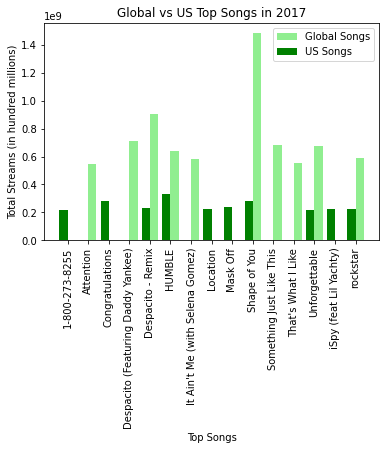

In [22]:
#create x variable 
unique_top_songs = global_vs_us_2017["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2017["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2017["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis + 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis - 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in hundred millions)")

#create title 
plt.title("Global vs US Top Songs in 2017")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_2017.png")

#show plot
plt.show()

In [23]:
#find songs that appear on both top lists
both = global_vs_us_2017.loc[(global_vs_us_2017["US Streams"] > 0) & (global_vs_us_2017["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = len(top_songs_2017)

#find percent of US songs that appear in global top ten
song_percent_2017 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2017}% of the same top ten songs as the global charts in 2017.") 

The US charts had 50.0% of the same top ten songs as the global charts in 2017.


Further analysis into the top 100 songs for 2017

In [24]:
# merge the extended data frames for topp 100 US songs and top 100 non-global song sums
top100_merged = pd.merge(top_songs_2017_ext, top_songs_US_2017_ext, how="outer", on=["title"])
len(outer_merged)
top100_merged

,title,total streams_x,date,artist,region,total streams_y
0,Shape of You,1.485011e+09,2017.0,Ed Sheeran,United States,278916058.0
1,Despacito - Remix,9.013116e+08,2017.0,"Luis Fonsi, Daddy Yankee, Justin Bieber",United States,232299068.0
2,Despacito (Featuring Daddy Yankee),7.139895e+08,2017.0,Luis Fonsi,United States,94972759.0
3,Something Just Like This,6.848113e+08,2017.0,"The Chainsmokers, Coldplay",United States,143171255.0
4,Unforgettable,6.757906e+08,2017.0,"French Montana, Swae Lee",United States,215180711.0
...,...,...,...,...,...,...
135,Moves,NaN,2017.0,Big Sean,United States,76563898.0
136,First Day Out,NaN,2017.0,Tee Grizzley,United States,75507666.0
137,You Was Right,NaN,2017.0,Lil Uzi Vert,United States,74207159.0
138,Both (feat Drake),NaN,2017.0,Gucci Mane,United States,74153982.0


In [25]:
#create df for global vs us streams 
global_vs_us_2017 = pd.DataFrame({"Songs": top100_merged["title"], "US Streams": top100_merged["total streams_y"], "Global Streams": top100_merged["total streams_x"]})

#reset df index
global_vs_us_2017 = global_vs_us_2017.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2017['Global Streams'] = global_vs_us_2017['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2017['US Streams'] = global_vs_us_2017['US Streams'].fillna(0)

#print df
global_vs_us_2017

,Songs,US Streams,Global Streams
0,1-800-273-8255,216950629.0,445710786.0
1,24K Magic,75607599.0,256687612.0
2,2U (feat Justin Bieber),0.0,381471303.0
3,Ahora Dice,0.0,207600013.0
4,Attention,121686882.0,548253656.0
...,...,...,...
135,goosebumps,196490882.0,250752479.0
136,iSpy (feat Lil Yachty),224773101.0,321574272.0
137,pick up the phone,83598597.0,0.0
138,rockstar,225517132.0,592356193.0


In [26]:
#find songs that appear on both top lists
both = global_vs_us_2017.loc[(global_vs_us_2017["US Streams"] > 0) & (global_vs_us_2017["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = len(top_songs_2017_ext)

#find percent of US songs that appear in global top ten
song_percent_2017 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2017}% of the same top 100 songs as the global charts in 2017.")

The US charts had 60.0% of the same top 100 songs as the global charts in 2017.


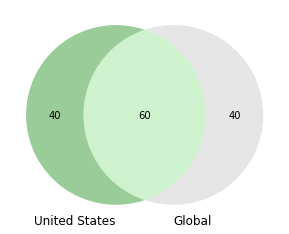

In [27]:
#create venn diagram
venn2([set(top_songs_US_2017_ext["title"]),
       set(top_songs_2017_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("_top_songs_2017_venn.png")

Top Songs 2018

In [28]:
# create data frame that only includes songs and streaming information for 2018
df_2018 = regional_df[(regional_df["date"] == 2018)]
df_2018.head()

,date,title,artist,region,total streams
66579,2018,!,O.S.T.R.,Poland,123714
66580,2018,!I'll Be Back!,Rilès,France,36343
66581,2018,42 - From SR3MM,"Rae Sremmurd, Swae Lee, Slim Jxmmi",United States,297731
66582,2018,Jag fakking hatar er,"ODZ, Young Earth Sauce",Sweden,235489
66583,2018,"Read All About It, Pt III",Emeli Sandé,Belgium,5479


In [29]:
# double bracket to keep from changing to a series, this line also totals the non global streams for each song
songs_by_total_streams18=df_2018.groupby("title")[["total streams"]].sum()
songs_by_total_streams18

,total streams
title,
!,123714
!I'll Be Back!,36343
'Di Na Muli,31765371
'Till I Collapse,29957585
(Don't Fear) The Reaper,645562
...,...
운명 The Chance of Love,1070
지켜줄게 Save You,3900
파란 봄,4237


In [30]:
# check to make sure it is still a dataframe and not a series 
type(songs_by_total_streams18)

pandas.core.frame.DataFrame

In [31]:
# sort dataframe of all 2018 songsand streaming numbers by total streams in descending order 
songs_2018 = songs_by_total_streams18.sort_values('total streams', ascending = False)
songs_2018

,total streams
title,
God's Plan,1104866242
SAD!,740678538
In My Feelings,692664196
Better Now,664053758
Psycho (feat Ty Dolla sign),660961130
...,...
Zaudējam Brāli,1002
Girl on Fire,1002
Homework Assignment,1002


In [32]:
# save top ten rows by streaming 
top_songs_2018 = songs_2018.head(10)

#print top ten
top_songs_2018.reset_index()

,title,total streams
0,God's Plan,1104866242
1,SAD!,740678538
2,In My Feelings,692664196
3,Better Now,664053758
4,Psycho (feat Ty Dolla sign),660961130
5,I Like It,656249898
6,One Kiss (with Dua Lipa),633831608
7,Girls Like You (feat Cardi B),591473982
8,Lucid Dreams,576329047
9,IDGAF,569487364


In [33]:
#save top 100 rows by streaming for further analysis section, reset index for venn diagram
top_songs_2018_ext = songs_2018.head(100).reset_index()
top_songs_2018_ext

,title,total streams
0,God's Plan,1104866242
1,SAD!,740678538
2,In My Feelings,692664196
3,Better Now,664053758
4,Psycho (feat Ty Dolla sign),660961130
...,...,...
95,Criminal,215779414
96,Pray For Me (with Kendrick Lamar),213954020
97,No Es Justo,212464395
98,Unforgettable,211823120


In [34]:
#create datframe for US 2017
df_US_2018 = regional_df[(regional_df["region"] == "United States") & (regional_df["date"] == 2018)]

#sort df by total streams 
songs_US_2018 = df_US_2018.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2018 = songs_US_2018.head(10)

#print top ten
top_songs_US_2018

,date,title,artist,region,total streams
91563,2018,God's Plan,Drake,United States,453226629
122834,2018,SAD!,XXXTENTACION,United States,332633597
119442,2018,Psycho (feat Ty Dolla sign),Post Malone,United States,306877012
106537,2018,Lucid Dreams,Juice WRLD,United States,299907223
105578,2018,Look Alive (feat Drake),BlocBoy JB,United States,266861797
112843,2018,Nice For What,Drake,United States,263455062
74661,2018,Better Now,Post Malone,United States,254098207
98444,2018,In My Feelings,Drake,United States,245715031
110459,2018,Moonlight,XXXTENTACION,United States,245410462
96383,2018,I Like It,"Cardi B, Bad Bunny, J Balvin",United States,240430007


In [35]:
#save top 100 rows by streaming for further analysis section, then reset index for venn diagram
top_songs_US_2018_ext = songs_US_2018.head(100)
top_songs_US_2018_ext

,date,title,artist,region,total streams
91563,2018,God's Plan,Drake,United States,453226629
122834,2018,SAD!,XXXTENTACION,United States,332633597
119442,2018,Psycho (feat Ty Dolla sign),Post Malone,United States,306877012
106537,2018,Lucid Dreams,Juice WRLD,United States,299907223
105578,2018,Look Alive (feat Drake),BlocBoy JB,United States,266861797
...,...,...,...,...,...
97707,2018,IDGAF,Dua Lipa,United States,86397943
93908,2018,Heaven,Kane Brown,United States,86069146
74561,2018,Better,Khalid,United States,85156431
106635,2018,Lucky You (feat Joyner Lucas),Eminem,United States,85144271


In [36]:
#merge the top ten US data frame with the top ten non-global data frame 
outer_merged18 = pd.merge(top_songs_2018, top_songs_US_2018, how="outer", on=["title"])
outer_merged18

,title,total streams_x,date,artist,region,total streams_y
0,God's Plan,1.104866e+09,2018.0,Drake,United States,453226629.0
1,SAD!,7.406785e+08,2018.0,XXXTENTACION,United States,332633597.0
2,In My Feelings,6.926642e+08,2018.0,Drake,United States,245715031.0
3,Better Now,6.640538e+08,2018.0,Post Malone,United States,254098207.0
4,Psycho (feat Ty Dolla sign),6.609611e+08,2018.0,Post Malone,United States,306877012.0
5,I Like It,6.562499e+08,2018.0,"Cardi B, Bad Bunny, J Balvin",United States,240430007.0
6,One Kiss (with Dua Lipa),6.338316e+08,NaN,NaN,NaN,NaN
7,Girls Like You (feat Cardi B),5.914740e+08,NaN,NaN,NaN,NaN
8,Lucid Dreams,5.763290e+08,2018.0,Juice WRLD,United States,299907223.0
9,IDGAF,5.694874e+08,NaN,NaN,NaN,NaN


In [37]:
#create df for global vs us streams 
global_vs_us_2018 = pd.DataFrame({"Songs": outer_merged18["title"], "US Streams": outer_merged18["total streams_y"], "Global Streams": outer_merged18["total streams_x"]})

#reset df index
global_vs_us_2018 = global_vs_us_2018.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2018['Global Streams'] = global_vs_us_2018['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2018['US Streams'] = global_vs_us_2018['US Streams'].fillna(0)

#print df
global_vs_us_2018

,Songs,US Streams,Global Streams
0,Better Now,254098207.0,6.640538e+08
1,Girls Like You (feat Cardi B),0.0,5.914740e+08
2,God's Plan,453226629.0,1.104866e+09
3,I Like It,240430007.0,6.562499e+08
4,IDGAF,0.0,5.694874e+08
5,In My Feelings,245715031.0,6.926642e+08
6,Look Alive (feat Drake),266861797.0,0.000000e+00
7,Lucid Dreams,299907223.0,5.763290e+08
8,Moonlight,245410462.0,0.000000e+00
9,Nice For What,263455062.0,0.000000e+00


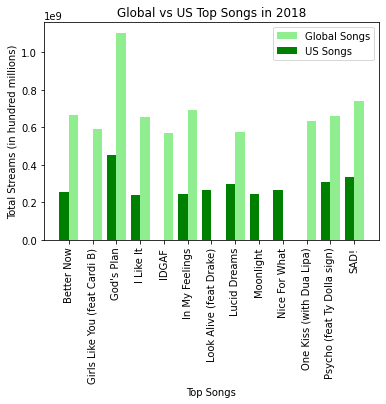

In [38]:
#create x vaiable 
unique_top_songs = global_vs_us_2018["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2018["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2018["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis + 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis - 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in hundred millions)")

#create title 
plt.title("Global vs US Top Songs in 2018")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_2018.png")

#show plot
plt.show()

In [39]:
#find songs that appear on both top lists
both = global_vs_us_2018.loc[(global_vs_us_2018["US Streams"] > 0) & (global_vs_us_2018["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = len(top_songs_2018)

#find percent of US songs that appear in global top ten
song_percent_2018 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2018}% of the same top ten songs as the global charts in 2018.") 


The US charts had 70.0% of the same top ten songs as the global charts in 2018.


Further analysis into the top 100 songs for 2018

In [40]:
# merge extended top song data frames for 2018 (top 100 US and top 100 non-global summed)
top100_merged18 = pd.merge(top_songs_2018_ext, top_songs_US_2018_ext, how="outer", on=["title"])
top100_merged18

,title,total streams_x,date,artist,region,total streams_y
0,God's Plan,1.104866e+09,2018.0,Drake,United States,453226629.0
1,SAD!,7.406785e+08,2018.0,XXXTENTACION,United States,332633597.0
2,In My Feelings,6.926642e+08,2018.0,Drake,United States,245715031.0
3,Better Now,6.640538e+08,2018.0,Post Malone,United States,254098207.0
4,Psycho (feat Ty Dolla sign),6.609611e+08,2018.0,Post Malone,United States,306877012.0
...,...,...,...,...,...,...
132,Tequila,NaN,2018.0,Dan + Shay,United States,90133833.0
133,Wake Up in the Sky,NaN,2018.0,"Gucci Mane, Bruno Mars, Kodak Black",United States,89822965.0
134,The Way Life Goes (feat Oh Wonder),NaN,2018.0,Lil Uzi Vert,United States,87844456.0
135,Heaven,NaN,2018.0,Kane Brown,United States,86069146.0


In [41]:
#create df for global vs us streams 
global_vs_us_2018 = pd.DataFrame({"Songs": top100_merged18["title"], "US Streams": top100_merged18["total streams_y"], "Global Streams": top100_merged18["total streams_x"]})

#reset df index
global_vs_us_2018 = global_vs_us_2018.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2018['Global Streams'] = global_vs_us_2018['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2018['US Streams'] = global_vs_us_2018['US Streams'].fillna(0)

#print df
global_vs_us_2018


,Songs,US Streams,Global Streams
0,"1, 2, 3 (feat Jason Derulo & De La Ghetto)",0.0,223727071.0
1,1-800-273-8255,95414792.0,0.0
2,2002,0.0,283803434.0
3,All Girls Are The Same,143447522.0,0.0
4,All The Stars (with SZA),185113340.0,454335070.0
...,...,...,...
132,rockstar,112816631.0,339074250.0
133,rockstar (feat 21 Savage),152300383.0,390856859.0
134,"thank u, next",124951058.0,353741985.0
135,the remedy for a broken heart (why am I so in ...,91695752.0,0.0


In [42]:

#find songs that appear on both top lists
both = global_vs_us_2018.loc[(global_vs_us_2018["US Streams"] > 0) & (global_vs_us_2018["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = len(top_songs_2018_ext)

#find percent of US songs that appear in global top ten
song_percent_2018 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2018}% of the same top 100 songs as the global charts in 2018.")

The US charts had 63.0% of the same top 100 songs as the global charts in 2018.


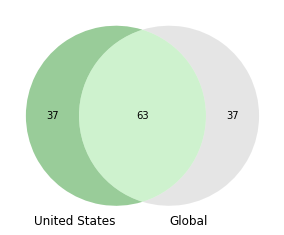

In [43]:
#create venn diagram
venn2([set(top_songs_US_2018_ext["title"]),
       set(top_songs_2018_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("_top_songs_2018_venn.png")

Top Songs 2019

In [44]:
# create data frame that only includes songs and streaming information for 2018
df_2019 = regional_df[(regional_df["date"] == 2019)]
df_2019.head()

,date,title,artist,region,total streams
149228,2019,!,"Samey, Gleb",Czech Republic,56857
149229,2019,!,"Samey, Gleb",Slovakia,364843
149230,2019,!,Trippie Redd,Australia,32996
149231,2019,!,Trippie Redd,Belgium,6951
149232,2019,!,Trippie Redd,Canada,232153


In [45]:
# double bracket to keep from changing to a series, this line also totals the non global streams for each song
songs_by_total_streams19=df_2019.groupby("title")[["total streams"]].sum()
songs_by_total_streams19

,total streams
title,
!,3529796
%%(Eung Eung),611817
'Di Lahat,921094
'Di Na Babalik,28777437
'Di Na Muli,19508760
...,...
龍舌蘭,1620275
끝,52822
달라달라 (DALLA DALLA),22250122


In [46]:
# sort dataframe of songs from this year by total streams in descending order 
songs_2019 = songs_by_total_streams19.sort_values('total streams', ascending = False)
songs_2019

,total streams
title,
Señorita,1069771166
bad guy,1047934777
Sunflower - Spider-Man: Into the Spider-Verse,941899962
7 rings,926055999
I Don't Care (with Justin Bieber),808995507
...,...
Neria,1004
Gomari,1004
Последно предупреждение,1003


In [47]:
# save top ten rows by streaming 
top_songs_2019 = songs_2019.head(10)

# print top ten
top_songs_2019.reset_index()

,title,total streams
0,Señorita,1069771166
1,bad guy,1047934777
2,Sunflower - Spider-Man: Into the Spider-Verse,941899962
3,7 rings,926055999
4,I Don't Care (with Justin Bieber),808995507
5,Someone You Loved,760230469
6,Dance Monkey,754972889
7,Wow,677862346
8,Shallow,677708261
9,Con Calma,636281628


In [48]:
# save top 100 rows by streaming for further analysis section
top_songs_2019_ext = songs_2019.head(100).reset_index()
#print
top_songs_2019_ext.reset_index()

,index,title,total streams
0,0,Señorita,1069771166
1,1,bad guy,1047934777
2,2,Sunflower - Spider-Man: Into the Spider-Verse,941899962
3,3,7 rings,926055999
4,4,I Don't Care (with Justin Bieber),808995507
...,...,...,...
95,95,Ella Quiere Beber - Remix,224648100
96,96,Suge,224420691
97,97,11:00 PM,220412138
98,98,In My Mind,220053851


In [49]:
#create datframe for US from this year 
df_US_2019 = regional_df[(regional_df["region"] == "United States") & (regional_df["date"] == 2019)]

#sort df by total streams 
songs_US_2019 = df_US_2019.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2019 = songs_US_2019.head(10)

#print top ten
top_songs_US_2019

,date,title,artist,region,total streams
211054,2019,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",United States,389059531
221240,2019,Wow,Post Malone,United States,297846574
150460,2019,7 rings,Ariana Grande,United States,280698165
188644,2019,MIDDLE CHILD,J. Cole,United States,277704991
222912,2019,bad guy,Billie Eilish,United States,266782562
173001,2019,Going Bad (feat Drake),Meek Mill,United States,242889031
216312,2019,Truth Hurts,Lizzo,United States,239980228
202689,2019,Ransom,Lil Tecca,United States,214034982
166353,2019,Drip Too Hard (Lil Baby & Gunna),Lil Baby,United States,208752215
211530,2019,Swervin (feat 6ix9ine),A Boogie Wit da Hoodie,United States,205758012


In [50]:
#save top 100 rows by streaming for further analysis section
top_songs_US_2019_ext = songs_US_2019.head(100)
top_songs_US_2019_ext

,date,title,artist,region,total streams
211054,2019,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",United States,389059531
221240,2019,Wow,Post Malone,United States,297846574
150460,2019,7 rings,Ariana Grande,United States,280698165
188644,2019,MIDDLE CHILD,J. Cole,United States,277704991
222912,2019,bad guy,Billie Eilish,United States,266782562
...,...,...,...,...,...
224145,2019,i'm so tired,"Lauv, Troye Sivan",United States,84670678
224570,2019,lovely (with Khalid),Billie Eilish,United States,84428762
224963,2019,ocean eyes,Billie Eilish,United States,83628378
180898,2019,It's You,Ali Gatie,United States,82823503


In [51]:
#merge the top ten US data frame with the top ten non-global data frame 
outer_merged19 = pd.merge(top_songs_2019, top_songs_US_2019, how="outer", on=["title"])
outer_merged19

,title,total streams_x,date,artist,region,total streams_y
0,Señorita,1.069771e+09,NaN,NaN,NaN,NaN
1,bad guy,1.047935e+09,2019.0,Billie Eilish,United States,266782562.0
2,Sunflower - Spider-Man: Into the Spider-Verse,9.419000e+08,2019.0,"Post Malone, Swae Lee",United States,389059531.0
3,7 rings,9.260560e+08,2019.0,Ariana Grande,United States,280698165.0
4,I Don't Care (with Justin Bieber),8.089955e+08,NaN,NaN,NaN,NaN
5,Someone You Loved,7.602305e+08,NaN,NaN,NaN,NaN
6,Dance Monkey,7.549729e+08,NaN,NaN,NaN,NaN
7,Wow,6.778623e+08,2019.0,Post Malone,United States,297846574.0
8,Shallow,6.777083e+08,NaN,NaN,NaN,NaN
9,Con Calma,6.362816e+08,NaN,NaN,NaN,NaN


In [52]:
#create df for global vs us streams 
global_vs_us_2019 = pd.DataFrame({"Songs": outer_merged19["title"], "US Streams": outer_merged19["total streams_y"], "Global Streams": outer_merged19["total streams_x"]})

#reset df index
global_vs_us_2019 = global_vs_us_2019.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2019['Global Streams'] = global_vs_us_2019['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2019['US Streams'] = global_vs_us_2019['US Streams'].fillna(0)

#print df
global_vs_us_2019

,Songs,US Streams,Global Streams
0,7 rings,280698165.0,9.260560e+08
1,Con Calma,0.0,6.362816e+08
2,Dance Monkey,0.0,7.549729e+08
3,Drip Too Hard (Lil Baby & Gunna),208752215.0,0.000000e+00
4,Going Bad (feat Drake),242889031.0,0.000000e+00
5,I Don't Care (with Justin Bieber),0.0,8.089955e+08
6,MIDDLE CHILD,277704991.0,0.000000e+00
7,Ransom,214034982.0,0.000000e+00
8,Señorita,0.0,1.069771e+09
9,Shallow,0.0,6.777083e+08


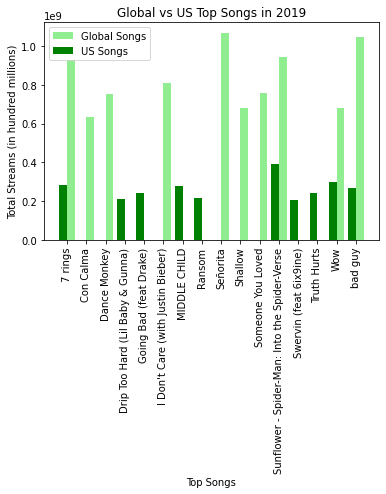

In [53]:
#create x vaiable 
unique_top_songs = global_vs_us_2019["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2019["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2019["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis + 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis - 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in hundred millions)")

#create title 
plt.title("Global vs US Top Songs in 2019")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_2019.png")

#show plot
plt.show()

In [54]:
#find songs that appear on both top lists
both = global_vs_us_2019.loc[(global_vs_us_2019["US Streams"] > 0) & (global_vs_us_2019["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = len(top_songs_2019)

#find percent of US songs that appear in global top ten
song_percent_2019 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2019}% of the same top ten songs as the global charts in 2019.") 

The US charts had 40.0% of the same top ten songs as the global charts in 2019.


Further analysis into the top 100 songs in 2019

In [55]:
# merge extended top song data frames for 2018 (top 100 US and top 100 non-global summed)
top100_merged19 = pd.merge(top_songs_2019_ext, top_songs_US_2019_ext, how="outer", on=["title"])
top100_merged19

,title,total streams_x,date,artist,region,total streams_y
0,Señorita,1.069771e+09,2019.0,"Shawn Mendes, Camila Cabello",United States,178554964.0
1,bad guy,1.047935e+09,2019.0,Billie Eilish,United States,266782562.0
2,Sunflower - Spider-Man: Into the Spider-Verse,9.419000e+08,2019.0,"Post Malone, Swae Lee",United States,389059531.0
3,7 rings,9.260560e+08,2019.0,Ariana Grande,United States,280698165.0
4,I Don't Care (with Justin Bieber),8.089955e+08,2019.0,Ed Sheeran,United States,144025311.0
...,...,...,...,...,...,...
132,I Like Me Better,NaN,2019.0,Lauv,United States,86316296.0
133,Money,NaN,2019.0,Cardi B,United States,85438932.0
134,Tequila,NaN,2019.0,Dan + Shay,United States,85154851.0
135,lovely (with Khalid),NaN,2019.0,Billie Eilish,United States,84428762.0


In [56]:
#create df for global vs us streams 
global_vs_us_2019 = pd.DataFrame({"Songs": top100_merged19["title"], "US Streams": top100_merged19["total streams_y"], "Global Streams": top100_merged19["total streams_x"]})

#reset df index
global_vs_us_2019 = global_vs_us_2019.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2019['Global Streams'] = global_vs_us_2019['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2019['US Streams'] = global_vs_us_2019['US Streams'].fillna(0)

#print df
global_vs_us_2019

,Songs,US Streams,Global Streams
0,11:00 PM,0.0,220412138.0
1,223's (feat 9lokknine),95746470.0,0.0
2,7 rings,280698165.0,926055999.0
3,Adan y Eva,0.0,327371199.0
4,All Girls Are The Same,109923109.0,0.0
...,...,...,...
132,ocean eyes,83628378.0,0.0
133,rockstar (feat 21 Savage),130084723.0,297820907.0
134,"thank u, next",182180801.0,520422655.0
135,when the party's over,177211774.0,431653372.0


In [57]:
#find songs that appear on both top lists
both = global_vs_us_2019.loc[(global_vs_us_2019["US Streams"] > 0) & (global_vs_us_2019["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = len(top_songs_2019_ext)

#find percent of US songs that appear in global top ten
song_percent_2019 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2019}% of the same top 100 songs as the global charts in 2019.")

The US charts had 63.0% of the same top 100 songs as the global charts in 2019.


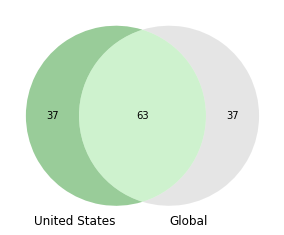

In [58]:
#create venn diagram
venn2([set(top_songs_US_2019_ext["title"]),
       set(top_songs_2019_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("_top_songs_2019_venn.png")

Top Songs 2020

In [59]:
# create data frame that only includes songs and streaming information for 2018
df_2020 = regional_df[(regional_df["date"] == 2020)]
df_2020.head()

,date,title,artist,region,total streams
228430,2020,!,"Samey, Gleb",Slovakia,133718
228431,2020,%_! Dig Selv,Artigeardit,Denmark,85639
228432,2020,213,YL,France,49321
228433,2020,24,Dolu Kadehi Ters Tut,Turkey,649313
228434,2020,24,"ProfJam, benji price",Portugal,131173


In [60]:
# double bracket to keep from changing to a series, this line also totals the non global streams for each song
songs_by_total_streams20=df_2020.groupby("title")[["total streams"]].sum()
songs_by_total_streams20

,total streams
title,
Again (feat Shantel May),4816
y vuelo,51100
!,133718
%_! Dig Selv,85639
'Di Na Babalik,1890115
...,...
돌덩이,404404
시작,8938614
우린 친구뿐일까,6075


In [61]:
# sort dataframe of songs from this year by total streams in descending order 
songs_2020 = songs_by_total_streams20.sort_values('total streams', ascending = False)
songs_2020

,total streams
title,
Blinding Lights,1634833360
Dance Monkey,1174788485
Roses - Imanbek Remix,1002277813
Don't Start Now,984501795
The Box,963973404
...,...
Jäätunud Jäljed,1002
Vesturbær (feat Class B),1002
Junkies Ate My Poodle,1002


In [62]:
# save top ten rows by streaming 
top_songs_2020 = songs_2020.head(10)

# print top ten
top_songs_2020.reset_index()

,title,total streams
0,Blinding Lights,1634833360
1,Dance Monkey,1174788485
2,Roses - Imanbek Remix,1002277813
3,Don't Start Now,984501795
4,The Box,963973404
5,Falling,873597763
6,ROCKSTAR (feat Roddy Ricch),865702375
7,Watermelon Sugar,798718357
8,Someone You Loved,746156240
9,death bed (coffee for your head),733676532


In [63]:
# save top 100 rows by streaming for further analysis section, must reset index for venn diagram to work 
top_songs_2020_ext = songs_2020.head(100).reset_index()
#print
len(top_songs_2020_ext.reset_index())

100

In [64]:
#create datframe for US from this year 
df_US_2020 = regional_df[(regional_df["region"] == "United States") & (regional_df["date"] == 2020)]

#sort df by total streams 
songs_US_2020 = df_US_2020.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2020 = songs_US_2020.head(10)

#print top ten
top_songs_US_2020

,date,title,artist,region,total streams
300559,2020,The Box,Roddy Ricch,United States,400892436
237940,2020,Blinding Lights,The Weeknd,United States,331037132
238354,2020,Blueberry Faygo,Lil Mosey,United States,272855565
286988,2020,ROCKSTAR (feat Roddy Ricch),DaBaby,United States,268822544
269526,2020,Life Is Good (feat Drake),Future,United States,240623838
242340,2020,Circles,Post Malone,United States,219423327
287132,2020,ROXANNE,Arizona Zervas,United States,202582156
306327,2020,WAP (feat Megan Thee Stallion),Cardi B,United States,200800495
307090,2020,Watermelon Sugar,Harry Styles,United States,200626866
306431,2020,WHATS POPPIN,Jack Harlow,United States,189004912


In [65]:
#save top 100 rows by streaming for further analysis section
top_songs_US_2020_ext = songs_US_2020.head(100)
len(top_songs_US_2020_ext)

100

In [66]:
#merge the top ten US data frame with the top ten non-global data frame 
outer_merged20 = pd.merge(top_songs_2020, top_songs_US_2020, how="outer", on=["title"])
outer_merged20

,title,total streams_x,date,artist,region,total streams_y
0,Blinding Lights,1.634833e+09,2020.0,The Weeknd,United States,331037132.0
1,Dance Monkey,1.174788e+09,NaN,NaN,NaN,NaN
2,Roses - Imanbek Remix,1.002278e+09,NaN,NaN,NaN,NaN
3,Don't Start Now,9.845018e+08,NaN,NaN,NaN,NaN
4,The Box,9.639734e+08,2020.0,Roddy Ricch,United States,400892436.0
5,Falling,8.735978e+08,NaN,NaN,NaN,NaN
6,ROCKSTAR (feat Roddy Ricch),8.657024e+08,2020.0,DaBaby,United States,268822544.0
7,Watermelon Sugar,7.987184e+08,2020.0,Harry Styles,United States,200626866.0
8,Someone You Loved,7.461562e+08,NaN,NaN,NaN,NaN
9,death bed (coffee for your head),7.336765e+08,NaN,NaN,NaN,NaN


In [67]:

#create df for global vs us streams 
global_vs_us_2020 = pd.DataFrame({"Songs": outer_merged20["title"], "US Streams": outer_merged20["total streams_y"], "Global Streams": outer_merged20["total streams_x"]})

#reset df index
global_vs_us_2020 = global_vs_us_2020.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2020['Global Streams'] = global_vs_us_2020['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2020['US Streams'] = global_vs_us_2020['US Streams'].fillna(0)

#print df
global_vs_us_2020

,Songs,US Streams,Global Streams
0,Blinding Lights,331037132.0,1.634833e+09
1,Blueberry Faygo,272855565.0,0.000000e+00
2,Circles,219423327.0,0.000000e+00
3,Dance Monkey,0.0,1.174788e+09
4,Don't Start Now,0.0,9.845018e+08
5,Falling,0.0,8.735978e+08
6,Life Is Good (feat Drake),240623838.0,0.000000e+00
7,ROCKSTAR (feat Roddy Ricch),268822544.0,8.657024e+08
8,ROXANNE,202582156.0,0.000000e+00
9,Roses - Imanbek Remix,0.0,1.002278e+09


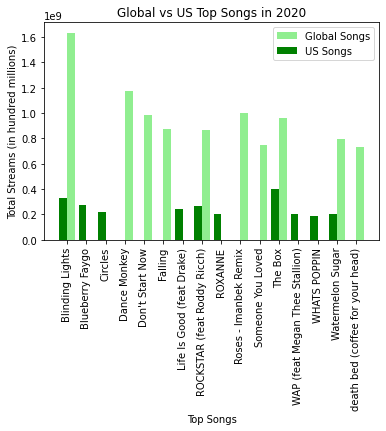

In [68]:
#create x vaiable 
unique_top_songs = global_vs_us_2020["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2020["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2020["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis + 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis - 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in hundred millions)")

#create title 
plt.title("Global vs US Top Songs in 2020")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_2020.png")

#show plot
plt.show()

In [69]:
# find songs that appear on both top lists
both = global_vs_us_2020.loc[(global_vs_us_2020["US Streams"] > 0) & (global_vs_us_2020["Global Streams"] > 0)]       

# count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

# count number of songs on global top ten chart
song_count = len(top_songs_2020)

# find percent of US songs that appear in global top ten
song_percent_2020 = US_song_count/song_count * 100

# print findings 
print(f"The US charts had {song_percent_2020}% of the same top ten songs as the global charts in 2020.") 

The US charts had 40.0% of the same top ten songs as the global charts in 2020.


Further analysis into the top 100 songs for 2020

In [70]:
# merge extended top song data frames for 2018 (top 100 US and top 100 non-global summed)
top100_merged20 = pd.merge(top_songs_2020_ext, top_songs_US_2020_ext, how="outer", on=["title"])
top100_merged20

,title,total streams_x,date,artist,region,total streams_y
0,Blinding Lights,1.634833e+09,2020.0,The Weeknd,United States,331037132.0
1,Dance Monkey,1.174788e+09,2020.0,Tones And I,United States,151107412.0
2,Roses - Imanbek Remix,1.002278e+09,2020.0,SAINt JHN,United States,172496651.0
3,Don't Start Now,9.845018e+08,2020.0,Dua Lipa,United States,179002480.0
4,The Box,9.639734e+08,2020.0,Roddy Ricch,United States,400892436.0
...,...,...,...,...,...,...
138,Myron,NaN,2020.0,Lil Uzi Vert,United States,81140683.0
139,Suge,NaN,2020.0,DaBaby,United States,79186368.0
140,Sum 2 Prove,NaN,2020.0,Lil Baby,United States,79172412.0
141,Hate The Other Side (with Marshmello & The Kid...,NaN,2020.0,"Juice WRLD, Polo G",United States,79118428.0


In [71]:
#create df for global vs us streams 
global_vs_us_2020 = pd.DataFrame({"Songs": top100_merged20["title"], "US Streams": top100_merged20["total streams_y"], "Global Streams": top100_merged20["total streams_x"]})

#reset df index
global_vs_us_2020 = global_vs_us_2020.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2020['Global Streams'] = global_vs_us_2020['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2020['US Streams'] = global_vs_us_2020['US Streams'].fillna(0)

#print df
global_vs_us_2020

,Songs,US Streams,Global Streams
0,"10,000 Hours (with Justin Bieber)",102192286.0,241936743.0
1,Adore You,175384087.0,524952313.0
2,After Party,118482861.0,0.0
3,All Girls Are The Same,145489010.0,0.0
4,Armed And Dangerous,81328671.0,0.0
...,...,...,...
137,lovely (with Khalid),104755992.0,298639315.0
138,positions,0.0,307250238.0
139,rockstar (feat 21 Savage),83158826.0,0.0
140,when the party's over,89479687.0,0.0


In [72]:
#find songs that appear on both top lists
both = global_vs_us_2020.loc[(global_vs_us_2020["US Streams"] > 0) & (global_vs_us_2020["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = len(top_songs_2020_ext)

#find percent of US songs that appear in global top ten
song_percent_2020 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2020}% of the same top 100 songs as the global charts in 2020.")

The US charts had 56.99999999999999% of the same top 100 songs as the global charts in 2020.


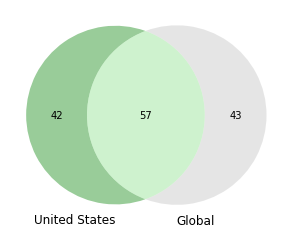

In [73]:
#create venn diagram
venn2([set(top_songs_US_2020_ext["title"]),
       set(top_songs_2020_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("_top_songs_2020_venn.png")

Top Songs 2021

In [74]:
# create data frame that only includes songs and streaming information for 2018
df_2021 = regional_df[(regional_df["date"] == 2021)]
df_2021.head()

,date,title,artist,region,total streams
319124,2021,!,"Samey, Gleb",Slovakia,3581
319125,2021,BOP,CJ,Finland,6516
319126,2021,AiChoAi,"Flo D, Giang Nguyễn",Vietnam,111969
319127,2021,BrooklynBloodPop!,SyKo,Estonia,40773
319128,2021,BrooklynBloodPop!,SyKo,Finland,7647


In [75]:
# double bracket to keep from changing to a series, this line also totals the non global streams for each song
songs_by_total_streams21=df_2021.groupby("title")[["total streams"]].sum()
songs_by_total_streams21

,total streams
title,
!,3581
'Til You Can't,2384299
'Till I Collapse,23207144
"'Zat You, Santa Claus? - Single Version",957347
(Christmas Eve) After Midnight,23554
...,...
예뻤어 You Were Beautiful,95854
우산 (feat 윤하),1427
욱 (UGH!),43909


In [76]:
# sort dataframe of songs from this year by total streams in descending order 
songs_2021 = songs_by_total_streams21.sort_values('total streams', ascending = False)
songs_2021

,total streams
title,
STAY (with Justin Bieber),1092134744
drivers license,1091477728
MONTERO (Call Me By Your Name),1083795914
good 4 u,1058000573
Levitating (feat DaBaby),904969402
...,...
Don't Dance 21,1003
Los Estudiantes,1002
"Teic, Kur Zeme Tā",1002


In [77]:
# save top ten rows by streaming 
top_songs_2021 = songs_2021.head(10)

# print top ten
top_songs_2021.reset_index()

,title,total streams
0,STAY (with Justin Bieber),1092134744
1,drivers license,1091477728
2,MONTERO (Call Me By Your Name),1083795914
3,good 4 u,1058000573
4,Levitating (feat DaBaby),904969402
5,Peaches (feat Daniel Caesar & Giveon),880476314
6,Kiss Me More (feat SZA),856853219
7,Blinding Lights,824993306
8,INDUSTRY BABY (feat Jack Harlow),771229258
9,Beggin',758772263


In [78]:
# save top 100 rows by streaming for further analysis section, reset index function is needed for venn diagram
top_songs_2021_ext = songs_2021.head(100).reset_index()
#print
top_songs_2021_ext.reset_index()

,index,title,total streams
0,0,STAY (with Justin Bieber),1092134744
1,1,drivers license,1091477728
2,2,MONTERO (Call Me By Your Name),1083795914
3,3,good 4 u,1058000573
4,4,Levitating (feat DaBaby),904969402
...,...,...,...
95,95,Heather,204655706
96,96,Permission to Dance,204392026
97,97,Circles,203253154
98,98,Way 2 Sexy (with Future & Young Thug),200475650


In [79]:
#create datframe for US from this year 
df_US_2021 = regional_df[(regional_df["region"] == "United States") & (regional_df["date"] == 2021)]

#sort df by total streams 
songs_US_2021 = df_US_2021.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_2021 = songs_US_2021.head(10)

#print top ten
top_songs_US_2021

,date,title,artist,region,total streams
397448,2021,good 4 u,Olivia Rodrigo,United States,316909493
396958,2021,drivers license,Olivia Rodrigo,United States,306465075
347346,2021,Heat Waves,Glass Animals,United States,274698424
354122,2021,Kiss Me More (feat SZA),Doja Cat,United States,268963860
357418,2021,Levitating (feat DaBaby),Dua Lipa,United States,259084916
360743,2021,MONTERO (Call Me By Your Name),Lil Nas X,United States,249089858
377469,2021,STAY (with Justin Bieber),The Kid LAROI,United States,241632288
373994,2021,RAPSTAR,Polo G,United States,222366492
350444,2021,INDUSTRY BABY (feat Jack Harlow),Lil Nas X,United States,217493707
396854,2021,deja vu,Olivia Rodrigo,United States,213855457


In [80]:
#save top 100 rows by streaming for further analysis section
top_songs_US_2021_ext = songs_US_2021.head(100)
top_songs_US_2021_ext

,date,title,artist,region,total streams
397448,2021,good 4 u,Olivia Rodrigo,United States,316909493
396958,2021,drivers license,Olivia Rodrigo,United States,306465075
347346,2021,Heat Waves,Glass Animals,United States,274698424
354122,2021,Kiss Me More (feat SZA),Doja Cat,United States,268963860
357418,2021,Levitating (feat DaBaby),Dua Lipa,United States,259084916
...,...,...,...,...,...
345512,2021,Goosebumps - Remix,"Travis Scott, HVME",United States,75462580
362388,2021,Meet Me At Our Spot,"THE ANXIETY, WILLOW, Tyler Cole",United States,75047417
385969,2021,The Box,Roddy Ricch,United States,74404500
398336,2021,m y l i f e (with 21 Savage & Morray),J. Cole,United States,74102036


In [81]:
#merge the top ten US data frame with the top ten non-global data frame 
outer_merged21 = pd.merge(top_songs_2021, top_songs_US_2021, how="outer", on=["title"])
outer_merged21

,title,total streams_x,date,artist,region,total streams_y
0,STAY (with Justin Bieber),1.092135e+09,2021.0,The Kid LAROI,United States,241632288.0
1,drivers license,1.091478e+09,2021.0,Olivia Rodrigo,United States,306465075.0
2,MONTERO (Call Me By Your Name),1.083796e+09,2021.0,Lil Nas X,United States,249089858.0
3,good 4 u,1.058001e+09,2021.0,Olivia Rodrigo,United States,316909493.0
4,Levitating (feat DaBaby),9.049694e+08,2021.0,Dua Lipa,United States,259084916.0
5,Peaches (feat Daniel Caesar & Giveon),8.804763e+08,NaN,NaN,NaN,NaN
6,Kiss Me More (feat SZA),8.568532e+08,2021.0,Doja Cat,United States,268963860.0
7,Blinding Lights,8.249933e+08,NaN,NaN,NaN,NaN
8,INDUSTRY BABY (feat Jack Harlow),7.712293e+08,2021.0,Lil Nas X,United States,217493707.0
9,Beggin',7.587723e+08,NaN,NaN,NaN,NaN


In [82]:
#create df for global vs us streams 
global_vs_us_2021 = pd.DataFrame({"Songs": outer_merged21["title"], "US Streams": outer_merged21["total streams_y"], "Global Streams": outer_merged21["total streams_x"]})

#reset df index
global_vs_us_2021 = global_vs_us_2021.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2021['Global Streams'] = global_vs_us_2021['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2021['US Streams'] = global_vs_us_2021['US Streams'].fillna(0)

#print df
global_vs_us_2021

,Songs,US Streams,Global Streams
0,Beggin',0.0,7.587723e+08
1,Blinding Lights,0.0,8.249933e+08
2,Heat Waves,274698424.0,0.000000e+00
3,INDUSTRY BABY (feat Jack Harlow),217493707.0,7.712293e+08
4,Kiss Me More (feat SZA),268963860.0,8.568532e+08
5,Levitating (feat DaBaby),259084916.0,9.049694e+08
6,MONTERO (Call Me By Your Name),249089858.0,1.083796e+09
7,Peaches (feat Daniel Caesar & Giveon),0.0,8.804763e+08
8,RAPSTAR,222366492.0,0.000000e+00
9,STAY (with Justin Bieber),241632288.0,1.092135e+09


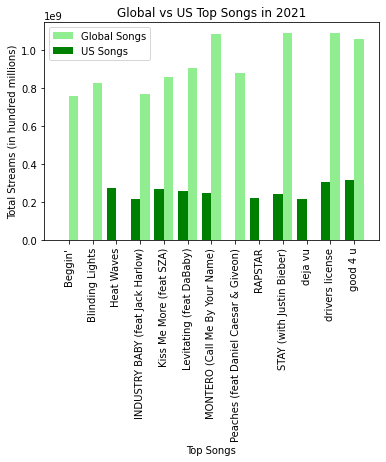

In [83]:
#create x vaiable 
unique_top_songs = global_vs_us_2021["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us_2021["Global Streams"]

#define y variable #2
us_songs = global_vs_us_2021["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis + 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis - 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in hundred millions)")

#create title 
plt.title("Global vs US Top Songs in 2021")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_2021.png")

#show plot
plt.show()

In [84]:
#find songs that appear on both top lists
both = global_vs_us_2021.loc[(global_vs_us_2021["US Streams"] > 0) & (global_vs_us_2021["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = len(top_songs_2021)

#find percent of US songs that appear in global top ten
song_percent_2021 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2021}% of the same top ten songs as the global charts in 2021.")

The US charts had 70.0% of the same top ten songs as the global charts in 2021.


Further analysis into the top 100 song in 2021

In [85]:
# merge extended top song data frames for 2018 (top 100 US and top 100 non-global summed)
top100_merged21 = pd.merge(top_songs_2021_ext, top_songs_US_2021_ext, how="outer", on=["title"])
top100_merged21

,title,total streams_x,date,artist,region,total streams_y
0,STAY (with Justin Bieber),1.092135e+09,2021.0,The Kid LAROI,United States,241632288.0
1,drivers license,1.091478e+09,2021.0,Olivia Rodrigo,United States,306465075.0
2,MONTERO (Call Me By Your Name),1.083796e+09,2021.0,Lil Nas X,United States,249089858.0
3,good 4 u,1.058001e+09,2021.0,Olivia Rodrigo,United States,316909493.0
4,Levitating (feat DaBaby),9.049694e+08,2021.0,Dua Lipa,United States,259084916.0
...,...,...,...,...,...,...
139,505,NaN,2021.0,Arctic Monkeys,United States,76838609.0
140,Thot Shit,NaN,2021.0,Megan Thee Stallion,United States,75536523.0
141,Meet Me At Our Spot,NaN,2021.0,"THE ANXIETY, WILLOW, Tyler Cole",United States,75047417.0
142,The Box,NaN,2021.0,Roddy Ricch,United States,74404500.0


In [86]:
#create df for global vs us streams 
global_vs_us_2021 = pd.DataFrame({"Songs": top100_merged21["title"], "US Streams": top100_merged21["total streams_y"], "Global Streams": top100_merged21["total streams_x"]})

#reset df index
global_vs_us_2021 = global_vs_us_2021.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_2021['Global Streams'] = global_vs_us_2021['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_2021['US Streams'] = global_vs_us_2021['US Streams'].fillna(0)

#print df
global_vs_us_2021

,Songs,US Streams,Global Streams
0,2/Catorce,0.0,218932348.0
1,20 Min,98100970.0,0.0
2,2055,103181086.0,0.0
3,34+35,92195147.0,259726970.0
4,505,76838609.0,0.0
...,...,...,...
139,my ex's best friend (with blackbear),131258025.0,0.0
140,positions,94432999.0,359710419.0
141,telepatía,145027902.0,425455739.0
142,traitor,167545529.0,473398539.0


In [89]:
#find songs that appear on both top lists
both = global_vs_us_2021.loc[(global_vs_us_2021["US Streams"] > 0) & (global_vs_us_2021["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = len(top_songs_2021_ext)

#find percent of US songs that appear in global top ten
song_percent_2021 = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_2021}% of the same top 100 songs as the global charts in 2021.")

The US charts had 56.00000000000001% of the same top 100 songs as the global charts in 2021.


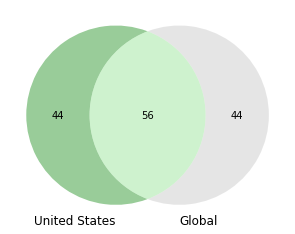

In [90]:
#create venn diagram
venn2([set(top_songs_US_2021_ext["title"]),
       set(top_songs_2021_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("_top_songs_2021_venn.png")

Top Songs Overall 2017-2021

In [91]:
#create datframe 
df_overall = regional_df

# double bracket to keep from changing to a series, this line also totals the non global streams for each song
songs_overall=df_overall.groupby("title")[["total streams"]].sum()

#print
songs_overall

,total streams
title,
Again (feat Shantel May),4816
y vuelo,51100
!,3790809
!I'll Be Back!,36343
%%(Eung Eung),611817
...,...
파란 봄,4237
피 땀 눈물,70997
항상 (HANGSANG),141250


In [92]:
#sort df by total streams 
sorted_songs_overall = songs_overall.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_overall = sorted_songs_overall.head(10)

#print top ten
top_songs_overall = top_songs_overall.reset_index()
top_songs_overall

,title,total streams
0,Blinding Lights,2559543032
1,Shape of You,2324245979
2,Dance Monkey,2179513029
3,Someone You Loved,1888979901
4,Sunflower - Spider-Man: Into the Spider-Verse,1740187843
5,Señorita,1644426942
6,bad guy,1586600706
7,Don't Start Now,1543022129
8,Lucid Dreams,1456142327
9,Happier,1412915268


In [93]:
#save top 100 rows by streaming 
top_songs_overall_ext = sorted_songs_overall.head(100).reset_index()
top_songs_overall_ext

,title,total streams
0,Blinding Lights,2559543032
1,Shape of You,2324245979
2,Dance Monkey,2179513029
3,Someone You Loved,1888979901
4,Sunflower - Spider-Man: Into the Spider-Verse,1740187843
...,...,...
95,Meant to Be (feat Florida Georgia Line),659922920
96,In My Mind,652119370
97,IDGAF,648997950
98,Calma - Remix,644915773


In [94]:
#create datframe for US overall
df_US_overall = regional_df[regional_df["region"] == "United States"]

# double bracket to keep from changing to a series, this line also totals the non global streams for each song
songs_overall_US=df_US_overall.groupby("title")[["total streams"]].sum()

#print
len(songs_overall_US)

7540

In [95]:
#sort df by total streams 
sorted_songs_US = songs_overall_US.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
top_songs_US_overall = sorted_songs_US.head(10)

#print top ten
top_songs_US_overall=top_songs_US_overall.reset_index()
top_songs_US_overall

,title,total streams
0,Sunflower - Spider-Man: Into the Spider-Verse,778581058
1,Lucid Dreams,769070890
2,goosebumps,624010649
3,SAD!,617887484
4,Jocelyn Flores,598009402
5,SICKO MODE,586638599
6,HUMBLE,549292830
7,XO Tour Llif3,541785400
8,I Fall Apart,541736865
9,Blinding Lights,536926299


In [96]:
#save top 100 rows by streaming 
top_songs_US_overall_ext = sorted_songs_US.head(100).reset_index()
len(top_songs_US_overall_ext)

100

In [97]:
# perform outer merge to include US streams and the sum of non global streams for each song
top10_merged = pd.merge(top_songs_overall, top_songs_US_overall, how="outer", on=["title"])
top10_merged=top10_merged.reset_index()
len(top10_merged)

17

In [98]:
#create df for global vs us streams 
global_vs_us = pd.DataFrame({"Songs": top10_merged["title"], "US Streams": top10_merged["total streams_y"], "Global Streams": top10_merged["total streams_x"]})

#reset df index
global_vs_us = global_vs_us.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us['Global Streams'] = global_vs_us['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us['US Streams'] = global_vs_us['US Streams'].fillna(0)

#print df
global_vs_us

,Songs,US Streams,Global Streams
0,Blinding Lights,536926299.0,2.559543e+09
1,Dance Monkey,0.0,2.179513e+09
2,Don't Start Now,0.0,1.543022e+09
3,HUMBLE,549292830.0,0.000000e+00
4,Happier,0.0,1.412915e+09
5,I Fall Apart,541736865.0,0.000000e+00
6,Jocelyn Flores,598009402.0,0.000000e+00
7,Lucid Dreams,769070890.0,1.456142e+09
8,SAD!,617887484.0,0.000000e+00
9,SICKO MODE,586638599.0,0.000000e+00


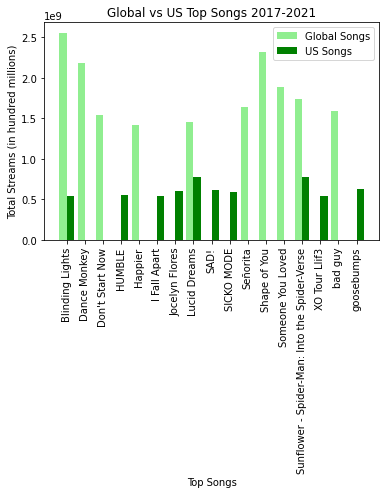

In [99]:
#create x variable 
unique_top_songs = global_vs_us["Songs"]

#define x variable
X = unique_top_songs

#define y variable #1
global_songs = global_vs_us["Global Streams"]

#define y variable #2
us_songs = global_vs_us["US Streams"]

#define length of x-axis
X_axis = np.arange(len(X))

#add colors 
color1 = "lightgreen"
color2 = "green"

#plot y variable #1
plt.bar(X_axis - 0.2, global_songs, 0.4, label = 'Global Songs', color=color1)

#plot y variable #2
plt.bar(X_axis + 0.2, us_songs, 0.4, label = 'US Songs', color=color2)

#plot x ticks
plt.xticks(X_axis, X)

#rotate x ticks
plt.xticks(rotation = 90)

#create labels 
plt.xlabel("Top Songs")
plt.ylabel("Total Streams (in hundred millions)")

#create title 
plt.title("Global vs US Top Songs 2017-2021")

#plot legend 
plt.legend()

#export chart to pngs
plt.savefig("Global_vs_US_top_songs_overall.png")

#show plot
plt.show()

In [100]:
#find songs that appear on both top lists
both = global_vs_us.loc[(global_vs_us["US Streams"] > 0) & (global_vs_us["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()

#count number of songs on global top ten chart
song_count = len(top_songs_US_overall)

#find percent of US songs that appear in global top ten
song_percent_overall = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_overall}% of the same top ten songs as the global charts 2017-2021.")

The US charts had 30.0% of the same top ten songs as the global charts 2017-2021.


In [101]:
# merge extended top song data frames for 2018 (top 100 US and top 100 non-global summed)
top100_merged_overall = pd.merge(top_songs_overall_ext, top_songs_US_overall_ext, how="outer", on=["title"])
top100_merged_overall

,title,total streams_x,total streams_y
0,Blinding Lights,2.559543e+09,536926299.0
1,Shape of You,2.324246e+09,346307680.0
2,Dance Monkey,2.179513e+09,256274759.0
3,Someone You Loved,1.888980e+09,408581521.0
4,Sunflower - Spider-Man: Into the Spider-Verse,1.740188e+09,778581058.0
...,...,...,...
139,Body Like A Back Road,NaN,257480631.0
140,Wishing Well,NaN,257015513.0
141,Come & Go (with Marshmello),NaN,254932712.0
142,iSpy (feat Lil Yachty),NaN,254921525.0


In [102]:
#create df for global vs us streams 
global_vs_us_ext = pd.DataFrame({"Songs": top100_merged_overall["title"], "US Streams": top100_merged_overall["total streams_y"], "Global Streams": top100_merged21["total streams_x"]})

#reset df index
global_vs_us_ext = global_vs_us_ext.groupby(['Songs']).first().reset_index()

#fill empty values with 0
global_vs_us_ext['Global Streams'] = global_vs_us_ext['Global Streams'].fillna(0)

#fill empty values with 0
global_vs_us_ext['US Streams'] = global_vs_us_ext['US Streams'].fillna(0)

#print df
global_vs_us_ext

,Songs,US Streams,Global Streams
0,1-800-273-8255,319116790.0,0.0
1,2002,0.0,218932348.0
2,7 rings,332694161.0,466295823.0
3,Adore You,0.0,224130599.0
4,All Girls Are The Same,519965548.0,0.0
...,...,...,...
139,positions,0.0,206448133.0
140,rockstar,338333763.0,345005928.0
141,rockstar (feat 21 Savage),380313220.0,284628152.0
142,"thank u, next",317987550.0,344813884.0


In [103]:
#find songs that appear on both top lists
both = global_vs_us_ext.loc[(global_vs_us_ext["US Streams"] > 0) & (global_vs_us_ext["Global Streams"] > 0)]       

#count number of songs  that appear on both top lists
US_song_count = both["Songs"].count()
US_song_count

56

In [104]:
#count number of songs on global top ten chart
song_count = len(top_songs_overall_ext)

#find percent of US songs that appear in global top ten
song_percent_ext = US_song_count/song_count * 100

#print findings 
print(f"The US charts had {song_percent_ext}% of the same top 100 songs as the global charts for 2017-2021.")

The US charts had 56.00000000000001% of the same top 100 songs as the global charts for 2017-2021.


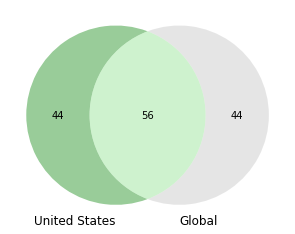

In [105]:
#create venn diagram 
venn2([set(top_songs_US_overall_ext["title"]),
       set(top_songs_overall_ext["title"])],
       set_labels=('United States', 'Global'),
       set_colors=('green', 'silver'))

#export chart to pngs
plt.savefig("top_songs_overall_venn.png")

Country Contribution to the Top Song from Each Year Analysis

In [106]:
# create ne data frame that only includes songs and streaming data from 2017
df_2017_all = chart_data[(chart_data["date"] == 2017)]

# sort data frame by total streams to determine the most popular song from this year
all_songs_2017 = df_2017_all.sort_values('total streams', ascending = False)

all_songs_2017

,date,title,artist,region,total streams
48188,2017,Shape of You,Ed Sheeran,Global,1479857019
12958,2017,Despacito - Remix,"Luis Fonsi, Daddy Yankee, Justin Bieber",Global,908572590
12901,2017,Despacito (Featuring Daddy Yankee),Luis Fonsi,Global,739156409
50763,2017,Something Just Like This,"The Chainsmokers, Coldplay",Global,686471678
20887,2017,HUMBLE,Kendrick Lamar,Global,650411808
...,...,...,...,...,...
36319,2017,Muy Personal (feat J Balvin),Yandel,Panama,1001
9634,2017,Chantaje (feat Maluma),Shakira,Luxembourg,1001
35602,2017,Mit Mondjak Még,Kowalsky Meg A Vega,Hungary,1001
4270,2017,"Baby, You Make Me Crazy",Sam Smith,Hungary,1001


In [107]:
# create df for the most streamed song from this year sorted by top contributing regions (excluding global)
shape_of_you = all_songs_2017[(all_songs_2017["title"] == "Shape of You") & (chart_data["region"] != "Global")]
shape_of_you

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_49877/3343112863.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  shape_of_you = all_songs_2017[(all_songs_2017["title"] == "Shape of You") & (chart_data["region"] != "Global")]


,date,title,artist,region,total streams
48223,2017,Shape of You,Ed Sheeran,United States,278916058
48222,2017,Shape of You,Ed Sheeran,United Kingdom,130658891
48187,2017,Shape of You,Ed Sheeran,Germany,96505235
48173,2017,Shape of You,Ed Sheeran,Brazil,95996545
48203,2017,Shape of You,Ed Sheeran,Mexico,86326454
48217,2017,Shape of You,Ed Sheeran,Sweden,63184448
48216,2017,Shape of You,Ed Sheeran,Spain,60057135
48211,2017,Shape of You,Ed Sheeran,Philippines,57245668
48204,2017,Shape of You,Ed Sheeran,Netherlands,55204354
48169,2017,Shape of You,Ed Sheeran,Australia,51174073


In [108]:
# check your work, if correct should be less than or equal to 68 (total number of regions in original data frame)
len(shape_of_you)

56

In [109]:
# truncate the data frame to only include the top ten countries by stream contribution for this song
shape_top = shape_of_you.head(10)
shape_top

,date,title,artist,region,total streams
48223,2017,Shape of You,Ed Sheeran,United States,278916058
48222,2017,Shape of You,Ed Sheeran,United Kingdom,130658891
48187,2017,Shape of You,Ed Sheeran,Germany,96505235
48173,2017,Shape of You,Ed Sheeran,Brazil,95996545
48203,2017,Shape of You,Ed Sheeran,Mexico,86326454
48217,2017,Shape of You,Ed Sheeran,Sweden,63184448
48216,2017,Shape of You,Ed Sheeran,Spain,60057135
48211,2017,Shape of You,Ed Sheeran,Philippines,57245668
48204,2017,Shape of You,Ed Sheeran,Netherlands,55204354
48169,2017,Shape of You,Ed Sheeran,Australia,51174073


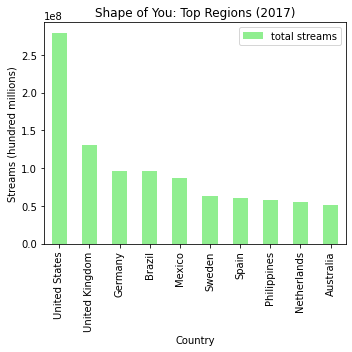

In [110]:
# create bar plot to better visualize each country's contribution 
shape_bar = shape_top.plot.bar(x='region', y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

# add title
plt.title("Shape of You: Top Regions (2017)")

# label xaxis
plt.xlabel("Country")

# lable yaxis
plt.ylabel("Streams (hundred millions)")

# adjust graph layout 
plt.tight_layout()

# export chart to pngs
plt.savefig("Shape_Top_Ten_Countries.png")

# show graph 
plt.show()   

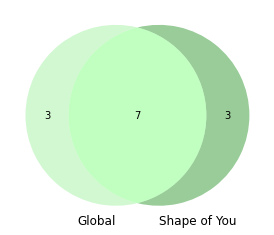

In [111]:
# create venn diagram for easier visual analysis
venn2([set(top_ten.index), 
       set(shape_top['region'].to_list())],
       set_labels=('Global', 'Shape of You'),
       set_colors=('lightgreen', 'green'),
     )

In [112]:
# create ne data frame that only includes songs and streaming data from 2018
all_songs_18 = chart_data[(chart_data["date"] == 2018)]

# sort data frame by total streams to determine the most popular song from this year
top_songs_18 = all_songs_18.sort_values('total streams', ascending = False)

top_songs_18

,date,title,artist,region,total streams
91525,2018,God's Plan,Drake,Global,1126032450
122797,2018,SAD!,XXXTENTACION,Global,764070077
119406,2018,Psycho (feat Ty Dolla sign),Post Malone,Global,702318729
98407,2018,In My Feelings,Drake,Global,702111864
74624,2018,Better Now,Post Malone,Global,686038136
...,...,...,...,...,...
127129,2018,Slide,James Bay,Slovakia,1001
130696,2018,Sweet Child O' Mine,Guns N' Roses,Honduras,1001
134481,2018,Through It All,Charlie Puth,Vietnam,1001
91285,2018,Glitch,"Martin Garrix, Julian Jordan",Estonia,1001


In [113]:
# create df for the most streamed song from this year sorted by top contributing regions (excluding global)
gods_plan = top_songs_18[(top_songs_18["title"] == "God's Plan") & (chart_data["region"] != "Global")]
gods_plan

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_49877/204006112.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gods_plan = top_songs_18[(top_songs_18["title"] == "God's Plan") & (chart_data["region"] != "Global")]


,date,title,artist,region,total streams
91563,2018,God's Plan,Drake,United States,453226629
91562,2018,God's Plan,Drake,United Kingdom,98750702
91512,2018,God's Plan,Drake,Canada,55809118
91524,2018,God's Plan,Drake,Germany,51393253
91506,2018,God's Plan,Drake,Australia,48905021
91510,2018,God's Plan,Drake,Brazil,45265461
91541,2018,God's Plan,Drake,Mexico,44443961
91542,2018,God's Plan,Drake,Netherlands,33744946
91523,2018,God's Plan,Drake,France,27576637
91557,2018,God's Plan,Drake,Sweden,27111313


In [114]:
# check your work, if correct should be less than or equal to 68 
len(gods_plan)

60

In [115]:
# truncate the data frame to only include the top ten countries by stream contribution for this song
gp_top = gods_plan.head(10)
gp_top

,date,title,artist,region,total streams
91563,2018,God's Plan,Drake,United States,453226629
91562,2018,God's Plan,Drake,United Kingdom,98750702
91512,2018,God's Plan,Drake,Canada,55809118
91524,2018,God's Plan,Drake,Germany,51393253
91506,2018,God's Plan,Drake,Australia,48905021
91510,2018,God's Plan,Drake,Brazil,45265461
91541,2018,God's Plan,Drake,Mexico,44443961
91542,2018,God's Plan,Drake,Netherlands,33744946
91523,2018,God's Plan,Drake,France,27576637
91557,2018,God's Plan,Drake,Sweden,27111313


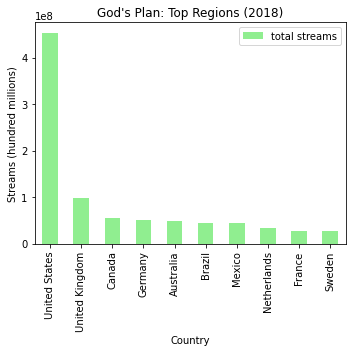

In [116]:
# create bar plot to better visualize each of the top ten country's contribution 
gp_bar = gp_top.plot.bar(x='region', y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

# add title
plt.title("God's Plan: Top Regions (2018)")

# label xaxis
plt.xlabel("Country")

# lable yaxis
plt.ylabel("Streams (hundred millions)")

# adjust graph layout 
plt.tight_layout()

# export chart to pngs
plt.savefig("gods_plan_top ten_countries.png")

# show graph 
plt.show()   

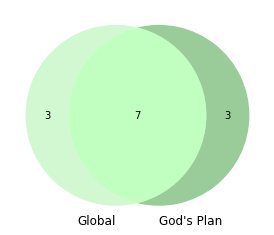

In [117]:
# create a venn diagram to show how many of the overall top contries contributed to this song 
venn2([set(top_ten.index), 
       set(gp_top['region'].to_list())],
       set_labels=('Global', "God's Plan"),
       set_colors=('lightgreen', 'green'),
     )

In [118]:
# filter data frame to only display songs from 2019
all_songs_2019 = chart_data[(chart_data["date"] == 2019)]

# sort dataframe by total streams (in descending order) to determine the most popular song from this year 
sorted_songs_2019 = all_songs_2019.sort_values('total streams', ascending = False)

sorted_songs_2019

,date,title,artist,region,total streams
206911,2019,Señorita,"Shawn Mendes, Camila Cabello",Global,1070267706
222870,2019,bad guy,Billie Eilish,Global,1052358787
211012,2019,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",Global,986906846
150418,2019,7 rings,Ariana Grande,Global,961361480
209271,2019,Someone You Loved,Lewis Capaldi,Global,823780323
...,...,...,...,...,...
206266,2019,Scared to Be Lonely,"Martin Garrix, Dua Lipa",Saudi Arabia,1001
178455,2019,I Think He Knows,Taylor Swift,Latvia,1001
201530,2019,Putana,Ninho,Morocco,1001
161408,2019,Clout (feat Cardi B),Offset,Latvia,1001


In [119]:
# create df for the most streamed song from this year sorted by top contributing regions (excluding global)
señorita = sorted_songs_2019[(sorted_songs_2019["title"] == "Señorita") & (chart_data["artist"] == "Shawn Mendes, Camila Cabello") & (chart_data["region"] != "Global")]
# this year had multiple songs named "señorita" so an extra filter for artist had to be added above 
señorita

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_49877/3085146009.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  señorita = sorted_songs_2019[(sorted_songs_2019["title"] == "Señorita") & (chart_data["artist"] == "Shawn Mendes, Camila Cabello") & (chart_data["region"] != "Global")]


,date,title,artist,region,total streams
206953,2019,Señorita,"Shawn Mendes, Camila Cabello",United States,178554964
206910,2019,Señorita,"Shawn Mendes, Camila Cabello",Germany,68105088
206928,2019,Señorita,"Shawn Mendes, Camila Cabello",Mexico,64803176
206952,2019,Señorita,"Shawn Mendes, Camila Cabello",United Kingdom,57663930
206895,2019,Señorita,"Shawn Mendes, Camila Cabello",Brazil,57029178
...,...,...,...,...,...
206896,2019,Señorita,"Shawn Mendes, Camila Cabello",Bulgaria,584978
206929,2019,Señorita,"Shawn Mendes, Camila Cabello",Morocco,452441
206932,2019,Señorita,"Shawn Mendes, Camila Cabello",Nicaragua,405426
206905,2019,Señorita,"Shawn Mendes, Camila Cabello",Egypt,227496


In [120]:
# check your work, if correct should be less than or equal to 68 (total number of regions in original df)
len(señorita)

65

In [121]:
# truncate the data frame to only include the top ten countries by stream contribution for this song
señorita_top = señorita.head(10)
señorita_top

,date,title,artist,region,total streams
206953,2019,Señorita,"Shawn Mendes, Camila Cabello",United States,178554964
206910,2019,Señorita,"Shawn Mendes, Camila Cabello",Germany,68105088
206928,2019,Señorita,"Shawn Mendes, Camila Cabello",Mexico,64803176
206952,2019,Señorita,"Shawn Mendes, Camila Cabello",United Kingdom,57663930
206895,2019,Señorita,"Shawn Mendes, Camila Cabello",Brazil,57029178
206919,2019,Señorita,"Shawn Mendes, Camila Cabello",Indonesia,52376276
206937,2019,Señorita,"Shawn Mendes, Camila Cabello",Philippines,42483717
206930,2019,Señorita,"Shawn Mendes, Camila Cabello",Netherlands,39025222
206897,2019,Señorita,"Shawn Mendes, Camila Cabello",Canada,37173138
206891,2019,Señorita,"Shawn Mendes, Camila Cabello",Australia,37083727


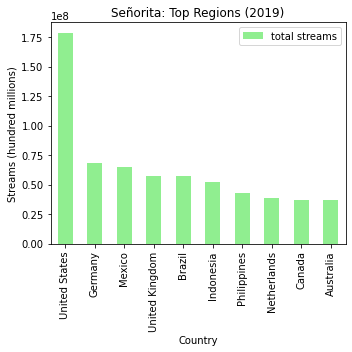

In [122]:
#create bar plot to show top 10 countries streams 
señorita_bar = señorita_top.plot.bar(x='region', y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Señorita: Top Regions (2019)")

#label xaxis
plt.xlabel("Country")

#lable yaxis
plt.ylabel("Streams (hundred millions)")

# top_countries_plot.bar_label(top_countries["total streams"], label_type='edge')

#adjust graph layout 
plt.tight_layout()

#export chart to pngs
plt.savefig("señorita_top_countries.png")

#show graph 
plt.show()   

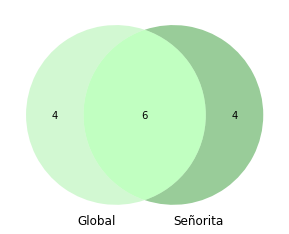

In [123]:
# create diagram to visualize how many of the top streaming contries were also a top contributor for this song 
venn2([set(top_ten.index), 
       set(señorita_top['region'].to_list())],
       set_labels=('Global', 'Señorita'),
       set_colors=('lightgreen', 'green'),
     )

In [124]:
# filter data frame to only display songs and streaming data for 2020
all_songs_2020 = chart_data[(chart_data["date"] == 2020)]

# sort dataframe by total streams (in descending order) to determine the most popular song from this year 
sorted_songs_2020 = all_songs_2020.sort_values('total streams', ascending = False)
sorted_songs_2020


,date,title,artist,region,total streams
237896,2020,Blinding Lights,The Weeknd,Global,1645923198
244984,2020,Dance Monkey,Tones And I,Global,1196397504
289202,2020,Roses - Imanbek Remix,SAINt JHN,Global,1040359432
300515,2020,The Box,Roddy Ricch,Global,1036463444
247554,2020,Don't Start Now,Dua Lipa,Global,1025910982
...,...,...,...,...,...
317148,2020,ده و ده,"Wegz, Abyusif",Egypt,1001
251030,2020,F33l Lik3 Dyin,Playboi Carti,Bulgaria,1001
284444,2020,Piccola,ElGrandeToto,Morocco,1001
309286,2020,X5,"Kastrācija, Steps",Latvia,1001


In [125]:
# create df for the most streamed song from this year sorted by top contributing regions (excluding global)
bl_2020 = sorted_songs_2020[(sorted_songs_2020["title"] == "Blinding Lights") & (chart_data["region"] != "Global")]
bl_2020

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_49877/2590182737.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bl_2020 = sorted_songs_2020[(sorted_songs_2020["title"] == "Blinding Lights") & (chart_data["region"] != "Global")]


,date,title,artist,region,total streams
237940,2020,Blinding Lights,The Weeknd,United States,331037132
237913,2020,Blinding Lights,The Weeknd,Mexico,144665106
237895,2020,Blinding Lights,The Weeknd,Germany,122234476
237939,2020,Blinding Lights,The Weeknd,United Kingdom,113847572
237880,2020,Blinding Lights,The Weeknd,Brazil,81100838
...,...,...,...,...,...
237881,2020,Blinding Lights,The Weeknd,Bulgaria,1170664
237917,2020,Blinding Lights,The Weeknd,Nicaragua,1055299
237914,2020,Blinding Lights,The Weeknd,Morocco,1052058
237890,2020,Blinding Lights,The Weeknd,Egypt,936518


In [126]:
# check your work, if correct should be less than or equal to 68 (total number of regions in original df)
len(bl_2020)

67

In [127]:
# truncate the data frame to only include the top ten countries by stream contribution for this song
bl_2020_top = bl_2020.head(10)
bl_2020_top

,date,title,artist,region,total streams
237940,2020,Blinding Lights,The Weeknd,United States,331037132
237913,2020,Blinding Lights,The Weeknd,Mexico,144665106
237895,2020,Blinding Lights,The Weeknd,Germany,122234476
237939,2020,Blinding Lights,The Weeknd,United Kingdom,113847572
237880,2020,Blinding Lights,The Weeknd,Brazil,81100838
237876,2020,Blinding Lights,The Weeknd,Australia,67035682
237894,2020,Blinding Lights,The Weeknd,France,65948733
237915,2020,Blinding Lights,The Weeknd,Netherlands,54929038
237932,2020,Blinding Lights,The Weeknd,Sweden,54271651
237882,2020,Blinding Lights,The Weeknd,Canada,54075826


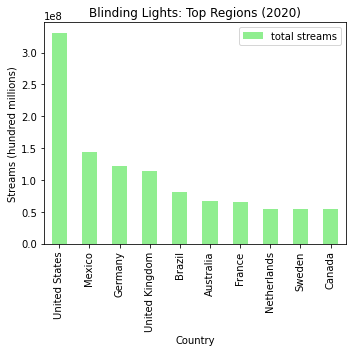

In [128]:
# create bar plot to visualize how each of these top countries contributed 
bl_bar_2020 = bl_2020_top.plot.bar(x='region', y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

# add title
plt.title("Blinding Lights: Top Regions (2020)")

# label xaxis
plt.xlabel("Country")

# lable yaxis
plt.ylabel("Streams (hundred millions)")

# top_countries_plot.bar_label(top_countries["total streams"], label_type='edge')

# adjust graph layout 
plt.tight_layout()

# export chart to pngs
plt.savefig("blinding_lights_2020_top_countries.png")

# show graph 
plt.show() 

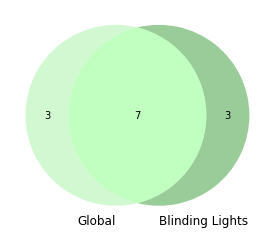

In [129]:
# create diagram to visualize how many of the top streaming contries were also a top contributor for this song 
venn2([set(top_ten.index), 
       set(bl_2020_top['region'].to_list())],
       set_labels=('Global', 'Blinding Lights'),
       set_colors=('lightgreen', 'green'),
     )

In [130]:
# create new data frame that only includes songs and streaming data for 2021
all_songs_2021 = chart_data[(chart_data["date"] == 2021)]

# sort data frame by total streams to determine the most popular song from this year
sorted_songs_2021 = all_songs_2021.sort_values('total streams', ascending = False)

sorted_songs_2021

,date,title,artist,region,total streams
396913,2021,drivers license,Olivia Rodrigo,Global,1166101369
377424,2021,STAY (with Justin Bieber),The Kid LAROI,Global,1165565254
360698,2021,MONTERO (Call Me By Your Name),Lil Nas X,Global,1129254815
397403,2021,good 4 u,Olivia Rodrigo,Global,1099668470
357373,2021,Levitating (feat DaBaby),Dua Lipa,Global,959583593
...,...,...,...,...,...
350171,2021,I'm Not The Only One,Sam Smith,Nicaragua,1001
334949,2021,Dangerous,"Kardinal Offishall, Akon",Lithuania,1001
378497,2021,Save That Shit,Lil Peep,Latvia,1001
383652,2021,"Supersonic (My Existence) [with Noisia, josh p...",Skrillex,Estonia,1001


In [131]:
# create df for the most streamed song from this year sorted by top contributing regions (excluding global)
drivers_license = sorted_songs_2021[(sorted_songs_2021["title"] == "drivers license") & (chart_data["region"] != "Global")]
drivers_license

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_49877/1911991997.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  drivers_license = sorted_songs_2021[(sorted_songs_2021["title"] == "drivers license") & (chart_data["region"] != "Global")]


,date,title,artist,region,total streams
396958,2021,drivers license,Olivia Rodrigo,United States,306465075
396957,2021,drivers license,Olivia Rodrigo,United Kingdom,81402221
396893,2021,drivers license,Olivia Rodrigo,Australia,53383305
396897,2021,drivers license,Olivia Rodrigo,Brazil,52823280
396930,2021,drivers license,Olivia Rodrigo,Mexico,51591263
...,...,...,...,...,...
396934,2021,drivers license,Olivia Rodrigo,Nicaragua,561353
396898,2021,drivers license,Olivia Rodrigo,Bulgaria,519498
396955,2021,drivers license,Olivia Rodrigo,Ukraine,510396
396931,2021,drivers license,Olivia Rodrigo,Morocco,440354


In [132]:
# check your work, if correct should be less than or equal to 68 (total number of regions in original df)
len(drivers_license)

68

In [133]:
# truncate the data frame to only include the top ten countries by stream contribution for this song
drivers_license_top = drivers_license.head(10)
drivers_license_top

,date,title,artist,region,total streams
396958,2021,drivers license,Olivia Rodrigo,United States,306465075
396957,2021,drivers license,Olivia Rodrigo,United Kingdom,81402221
396893,2021,drivers license,Olivia Rodrigo,Australia,53383305
396897,2021,drivers license,Olivia Rodrigo,Brazil,52823280
396930,2021,drivers license,Olivia Rodrigo,Mexico,51591263
396939,2021,drivers license,Olivia Rodrigo,Philippines,50715870
396912,2021,drivers license,Olivia Rodrigo,Germany,48208058
396921,2021,drivers license,Olivia Rodrigo,Indonesia,43175395
396899,2021,drivers license,Olivia Rodrigo,Canada,42631131
396932,2021,drivers license,Olivia Rodrigo,Netherlands,32669908


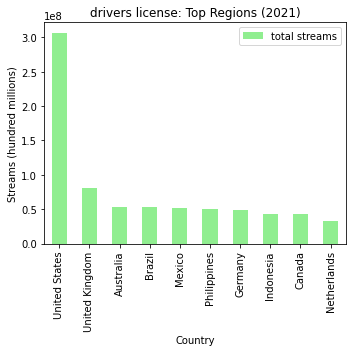

In [134]:
#create bar plot to show top 10 countries streams 
drivers_license_bar = drivers_license_top.plot.bar(x='region', y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("drivers license: Top Regions (2021)")

#label xaxis
plt.xlabel("Country")

#lable yaxis
plt.ylabel("Streams (hundred millions)")

# top_countries_plot.bar_label(top_countries["total streams"], label_type='edge')

#adjust graph layout 
plt.tight_layout()

#export chart to pngs
plt.savefig("drivers_license_top_countries.png")

#show graph 
plt.show()

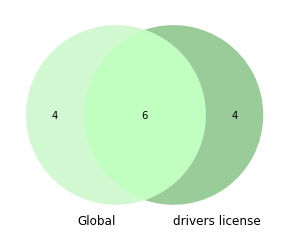

In [135]:
# create venn diagram to visualize how many of the top streaming contries were also a top contributor for song 
venn2([set(top_ten.index), 
       set(drivers_license_top['region'].to_list())],
       set_labels=('Global', 'drivers license'),
       set_colors=('lightgreen', 'green'),
     )

Question 3
Which artists were the most influential globally (broken down by year)?

In [136]:
#group 2017 dataframe by artist
artist_2017 = df_2017.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2017 = artist_2017["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2021 
top_artist_2017

artist
Ed Sheeran                                 4275283527
Kendrick Lamar                             1709399117
Drake                                      1400295170
Imagine Dragons                            1119721201
Lil Uzi Vert                               1043798015
Clean Bandit                                969291969
Bruno Mars                                  918331426
DJ Khaled                                   912795151
Luis Fonsi, Daddy Yankee, Justin Bieber     901311647
Future                                      860891558
Name: total streams, dtype: int64

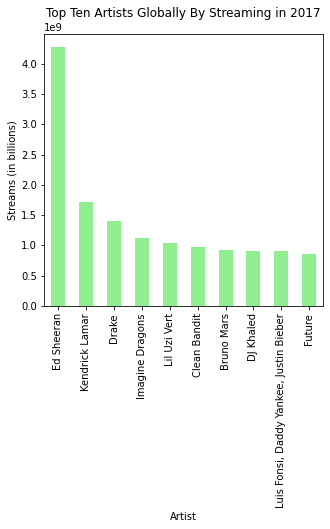

In [137]:
#plot top ten artists 2017
artists_2017_plot = top_artist_2017.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2017")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in billions)")

#show graph 
plt.show() 

In [138]:
#group 2018 dataframe by artist
artist_2018 = df_2018.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2018 = artist_2018["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2021 
top_artist_2018

artist
Drake              3611025560
Post Malone        3526200094
XXXTENTACION       3159304217
Ariana Grande      1640970017
Ed Sheeran         1452187327
Travis Scott       1330752110
Khalid             1171440940
Juice WRLD         1102055418
Imagine Dragons    1071658225
Dua Lipa           1035103704
Name: total streams, dtype: int64

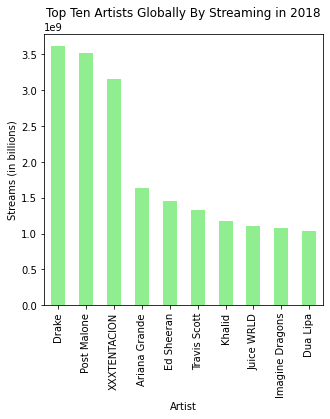

In [139]:
#plot top ten artists 2018 
artists_2018_plot = top_artist_2018.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2018")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in billions)")

#show graph 
plt.show() 

In [140]:
#group 2019 dataframe by artist
artist_2019 = df_2019.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2019 = artist_2019["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2021 
top_artist_2019

artist
Billie Eilish                   3646865767
Post Malone                     3474731770
Ariana Grande                   3007082349
Ed Sheeran                      2534931086
Juice WRLD                      1411361057
Khalid                          1355241568
Lil Nas X                       1272347060
Lewis Capaldi                   1108973076
Taylor Swift                    1068859823
Shawn Mendes, Camila Cabello    1066057541
Name: total streams, dtype: int64

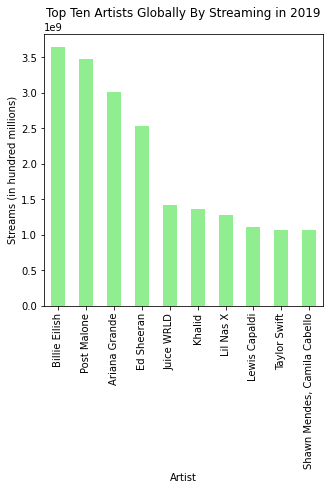

In [141]:
#plot top ten artists 2021 
artists_2019_plot = top_artist_2019.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2019")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in hundred millions)")

#show graph 
plt.show()  

In [142]:
#group 2020 dataframe by artist
artist_2020 = df_2020.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2020 = artist_2020["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2020 
top_artist_2020

artist
Juice WRLD       2674079179
The Weeknd       2387794589
Bad Bunny        2015389276
Dua Lipa         1954281061
Billie Eilish    1915002304
Pop Smoke        1727655872
Harry Styles     1663451046
Justin Bieber    1584569764
DaBaby           1507141957
Lewis Capaldi    1490480343
Name: total streams, dtype: int64

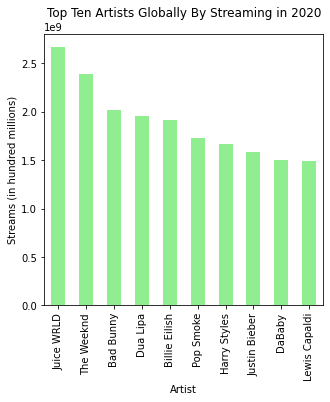

In [143]:
#plot top ten artists 2021 
artists_2020_plot = top_artist_2020.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2020")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in hundred millions)")

#show graph 
plt.show()  

In [144]:
#group 2021 dataframe by artist
artist_2021 = df_2021.groupby("artist")

#sum total streams for each artists and sort to find top ten
top_artist_2021 = artist_2021["total streams"].sum().sort_values(ascending=False).head(10)

#print top artists 2021 
top_artist_2021

artist
Olivia Rodrigo    4447896395
Doja Cat          2415019598
Lil Nas X         2297249095
The Weeknd        2274905677
Justin Bieber     2051325160
The Kid LAROI     1734744962
Drake             1733164898
Dua Lipa          1650766956
BTS               1577504053
Ed Sheeran        1562193905
Name: total streams, dtype: int64

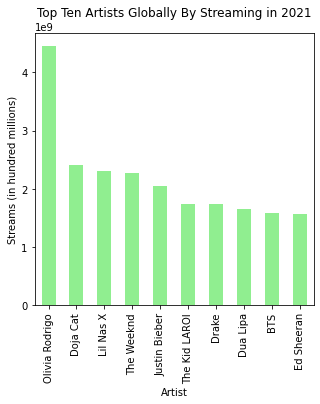

In [145]:
#plot top ten artists 2021 
artists_2021_plot = top_artist_2021.plot.bar(x = 'artist', y='streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Artists Globally By Streaming in 2021")

#label xaxis
plt.xlabel("Artist")

#lable yaxis
plt.ylabel("Streams (in hundred millions)")

#show graph 
plt.show() 